In [ ]:
# loading necessary libraries
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import log,dot,exp,shape
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from collections import Counter
from matplotlib.colors import ListedColormap
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the data
df = pd.read_csv("/content/drive/MyDrive/churn.csv", index_col=0)
df = pd.read_csv("/content/churn.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/churn.csv'

In [ ]:
# The first 5 observation
df.size()

NameError: name 'df' is not defined

In [ ]:
# The size of the data set
df.shape

(10000, 13)

In [ ]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df_no_duplicate = df.drop_duplicates()
df_no_duplicate.count()

CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
df = df_no_duplicate
df.isnull().values.sum()

0

therefore out data has no duplicate entries

In [ ]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [ ]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [ ]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

Exited (Dependent Variable)

In [ ]:
# Frequency of classes of dependent variable
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

In [ ]:
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

## Categorial variables Analysis

###1) Tenure

In [ ]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

Tenure
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: count, dtype: int64

In [ ]:
# Frequency of churn group according to Tenure
churn["Tenure"].value_counts().sort_values()

Tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64

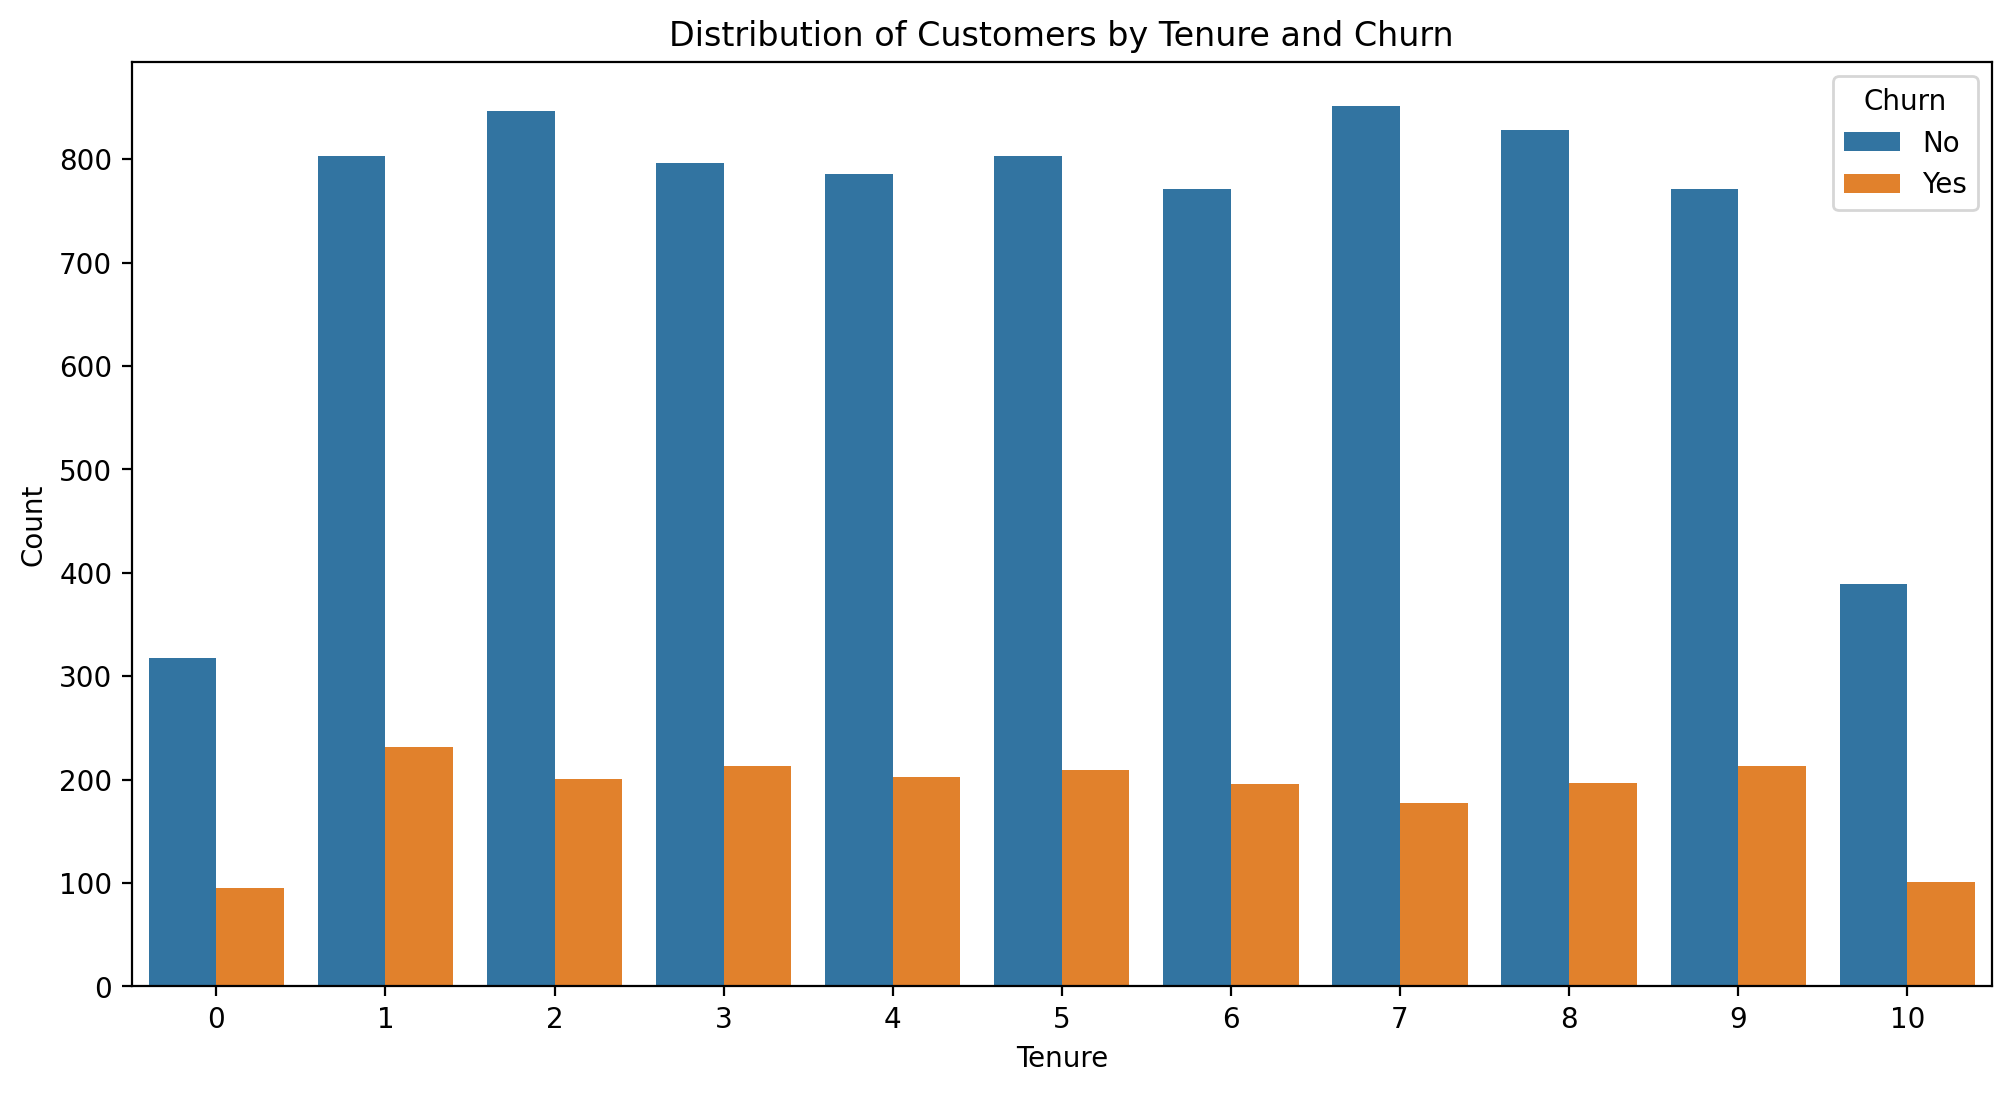

In [ ]:
# Distribution of customers based on tenure with churn information
plt.figure(figsize=(12, 6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Distribution of Customers by Tenure and Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

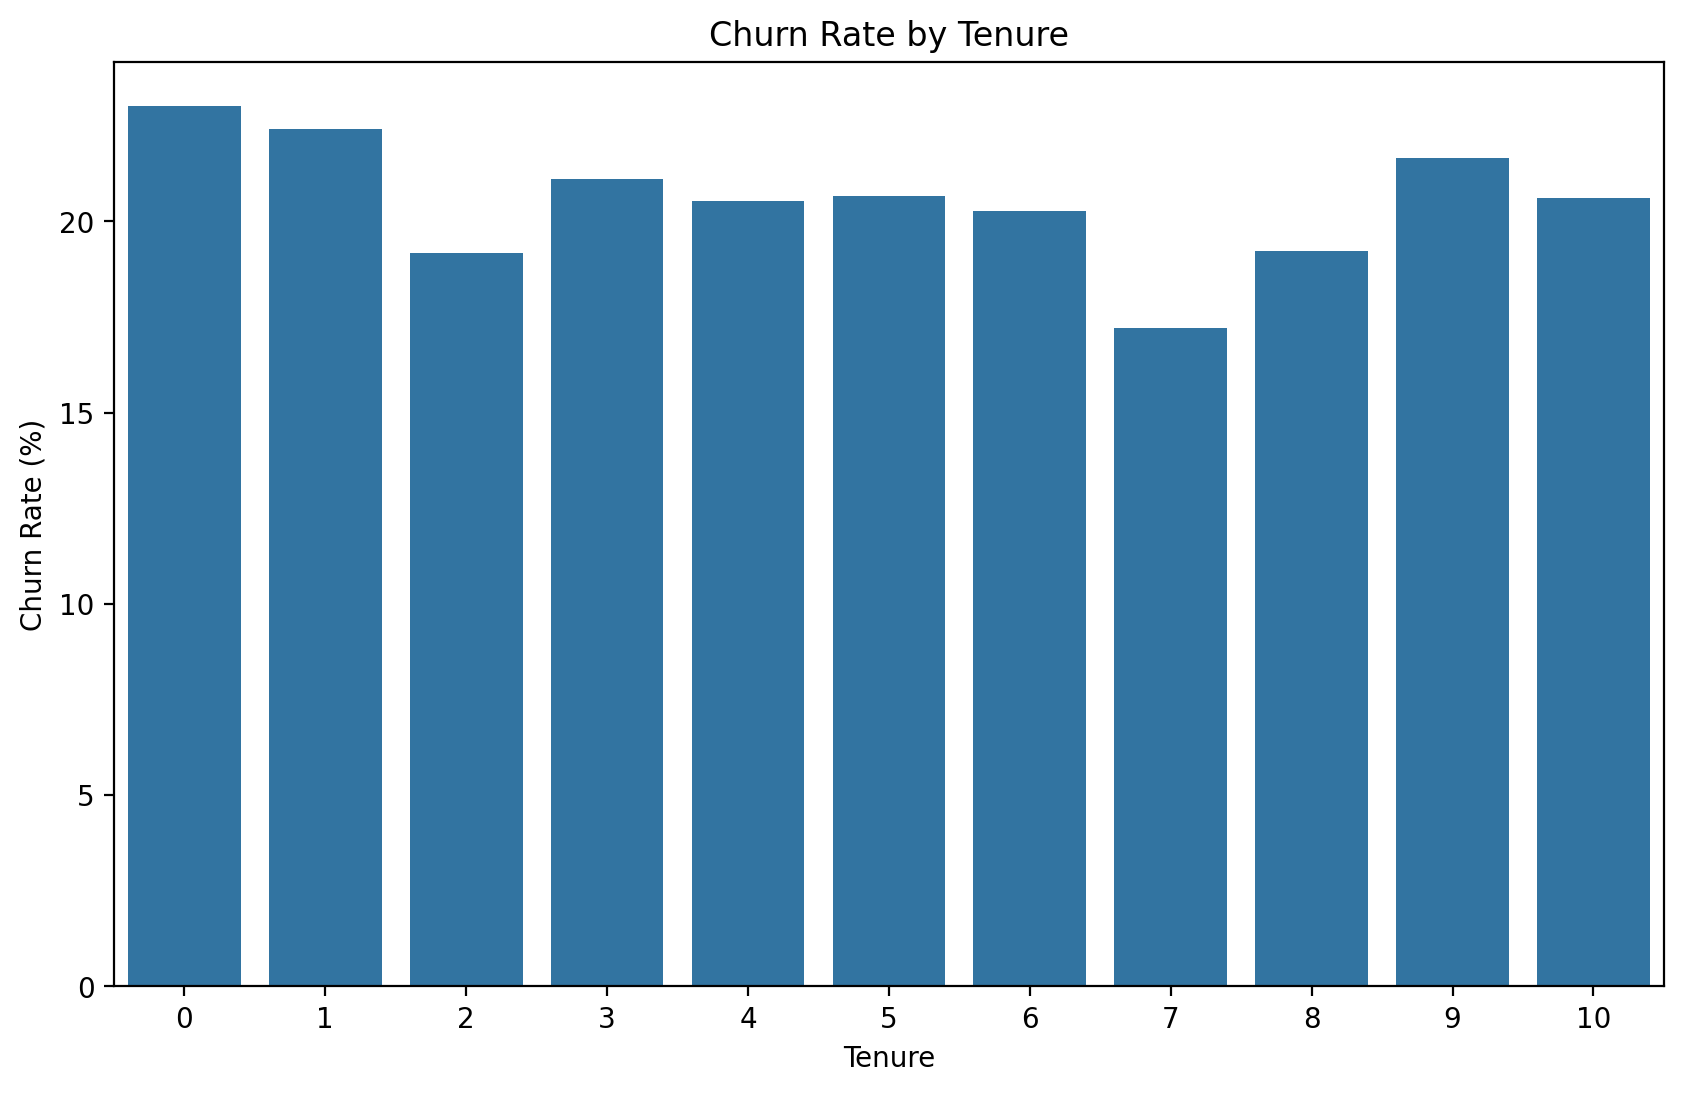

In [ ]:
# Relationship between tenure and churn
# Calculate churn rate for each tenure category
churn_rate_by_tenure = df.groupby('Tenure')['Exited'].mean() * 100
# Plot churn rate by tenure
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate (%)')
plt.show()

###2) Num of Products

In [ ]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
3      46
1    3675
2    4242
Name: count, dtype: int64

In [ ]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_values()

NumOfProducts
4      60
3     220
2     348
1    1409
Name: count, dtype: int64

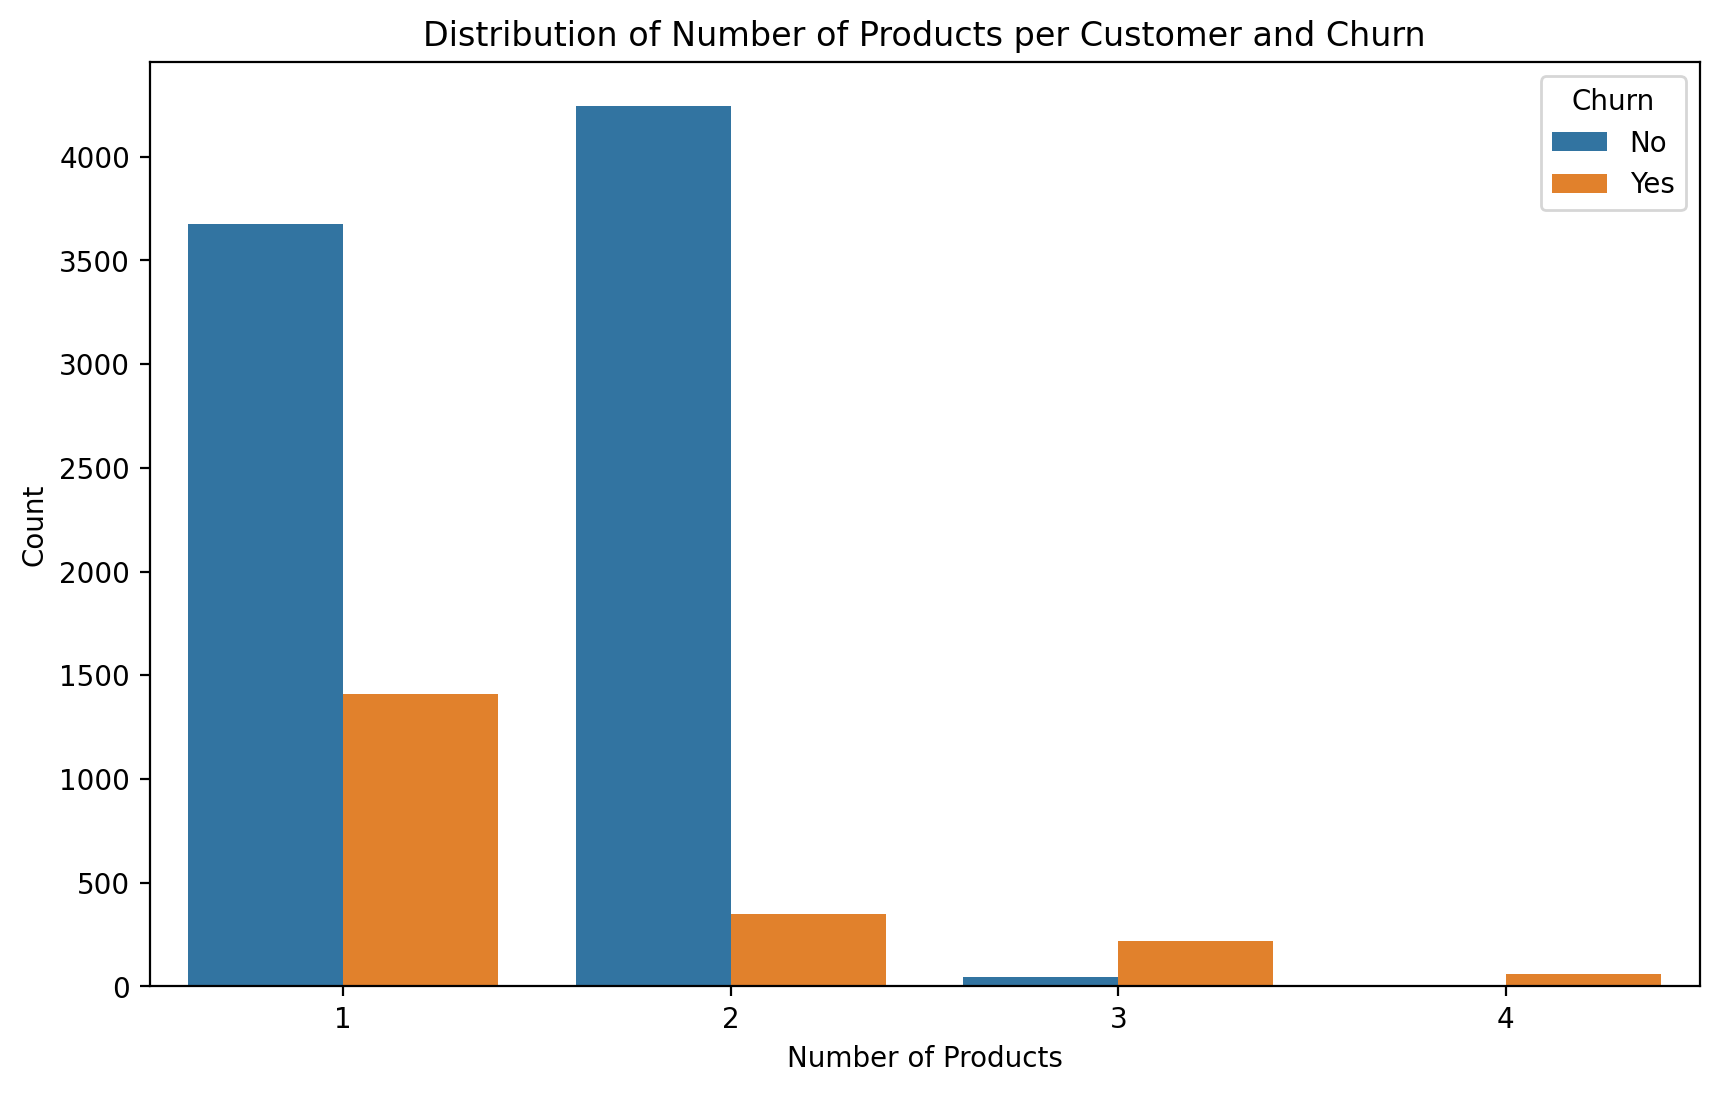

In [ ]:
# Distribution of the number of products per customer with churn information
#as no. of product inc churn dec
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Distribution of Number of Products per Customer and Churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

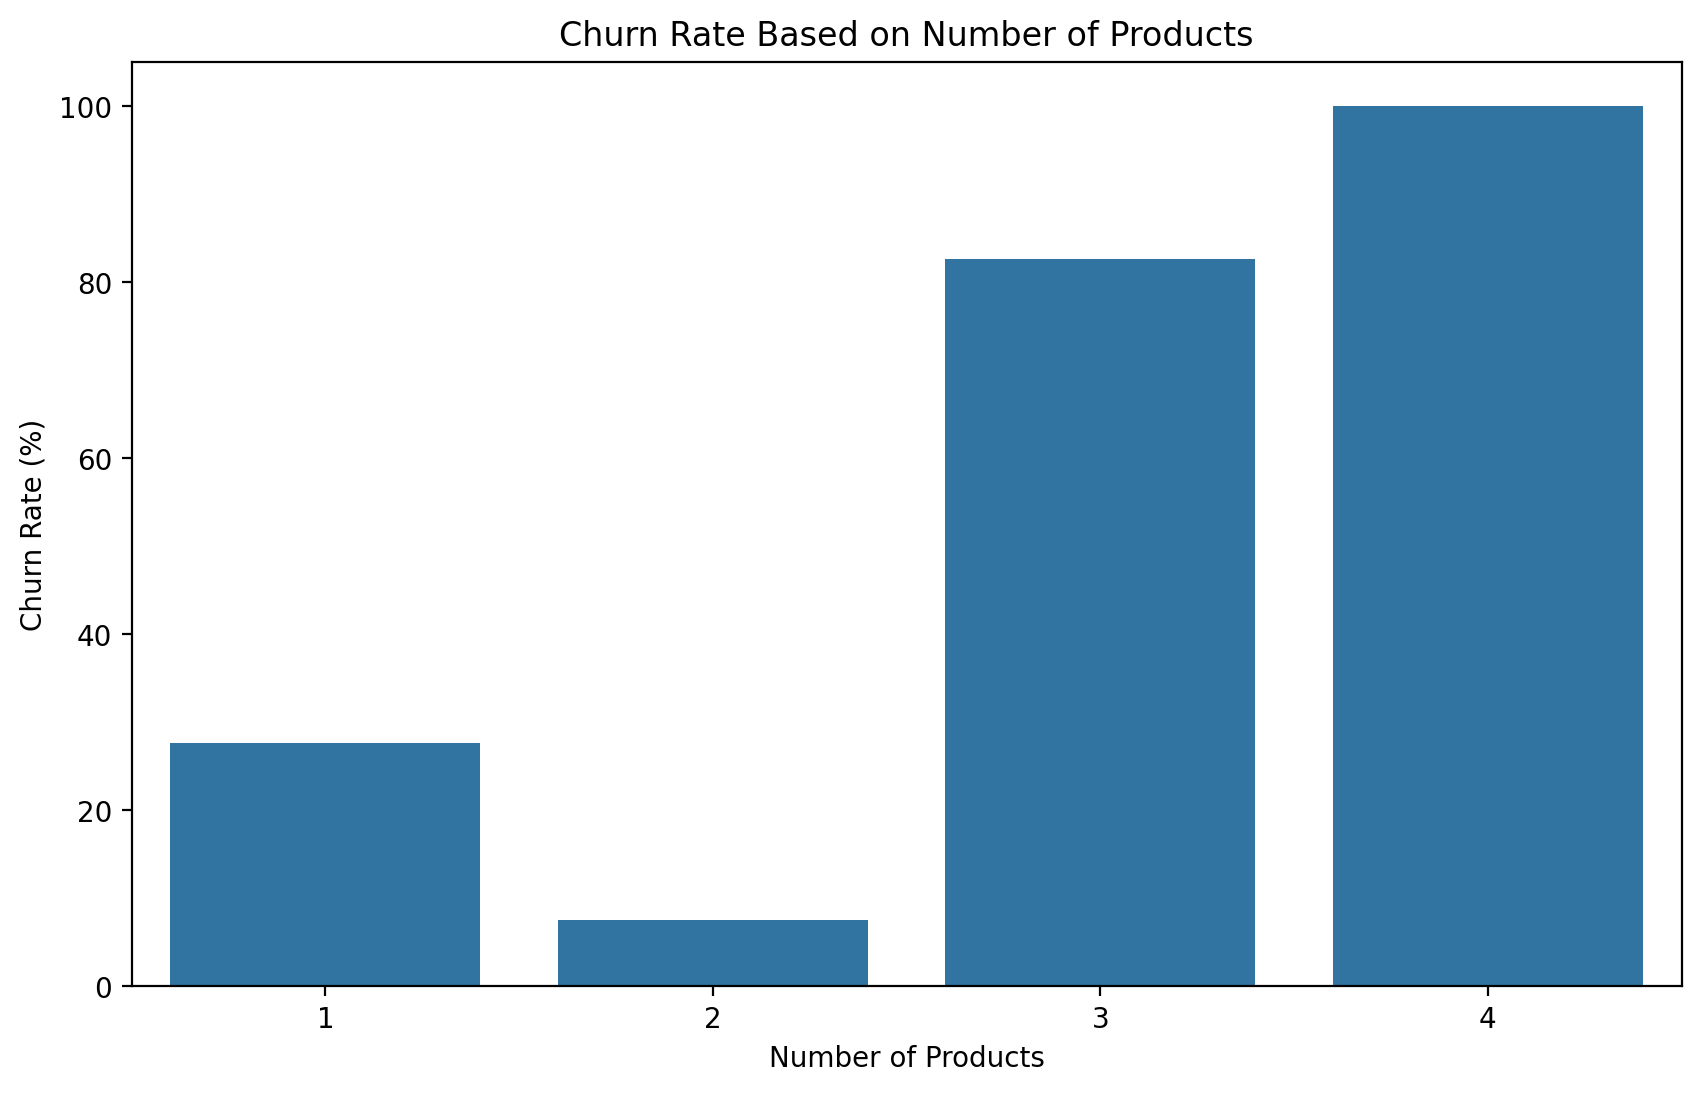

In [ ]:
# Churn rate based on the number of products
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=df, estimator=lambda x: sum(x) / len(x) * 100, errorbar=None)
plt.title('Churn Rate Based on Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (%)')
plt.show()

###3) Has Card


In [ ]:
# examining the HasCrCard of the not_churn group
not_churn["HasCrCard"].value_counts()

HasCrCard
1    5631
0    2332
Name: count, dtype: int64

In [ ]:
# examining the HasCrCard of the churn group
churn["HasCrCard"].value_counts()

HasCrCard
1    1424
0     613
Name: count, dtype: int64

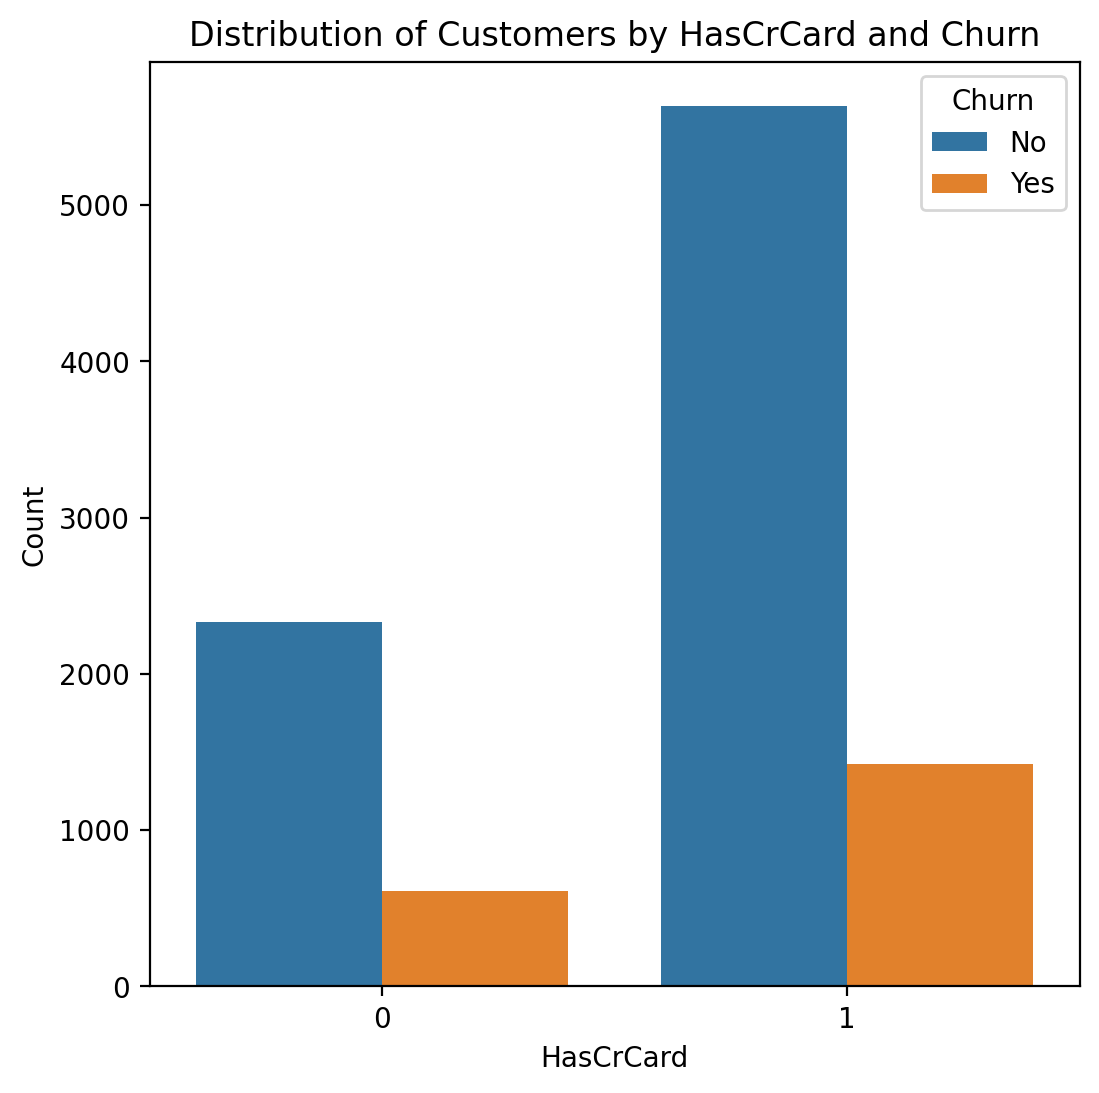

In [ ]:
# Distribution of customers based on HasCrCard with churn information
plt.figure(figsize=(6, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Distribution of Customers by HasCrCard and Churn')
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

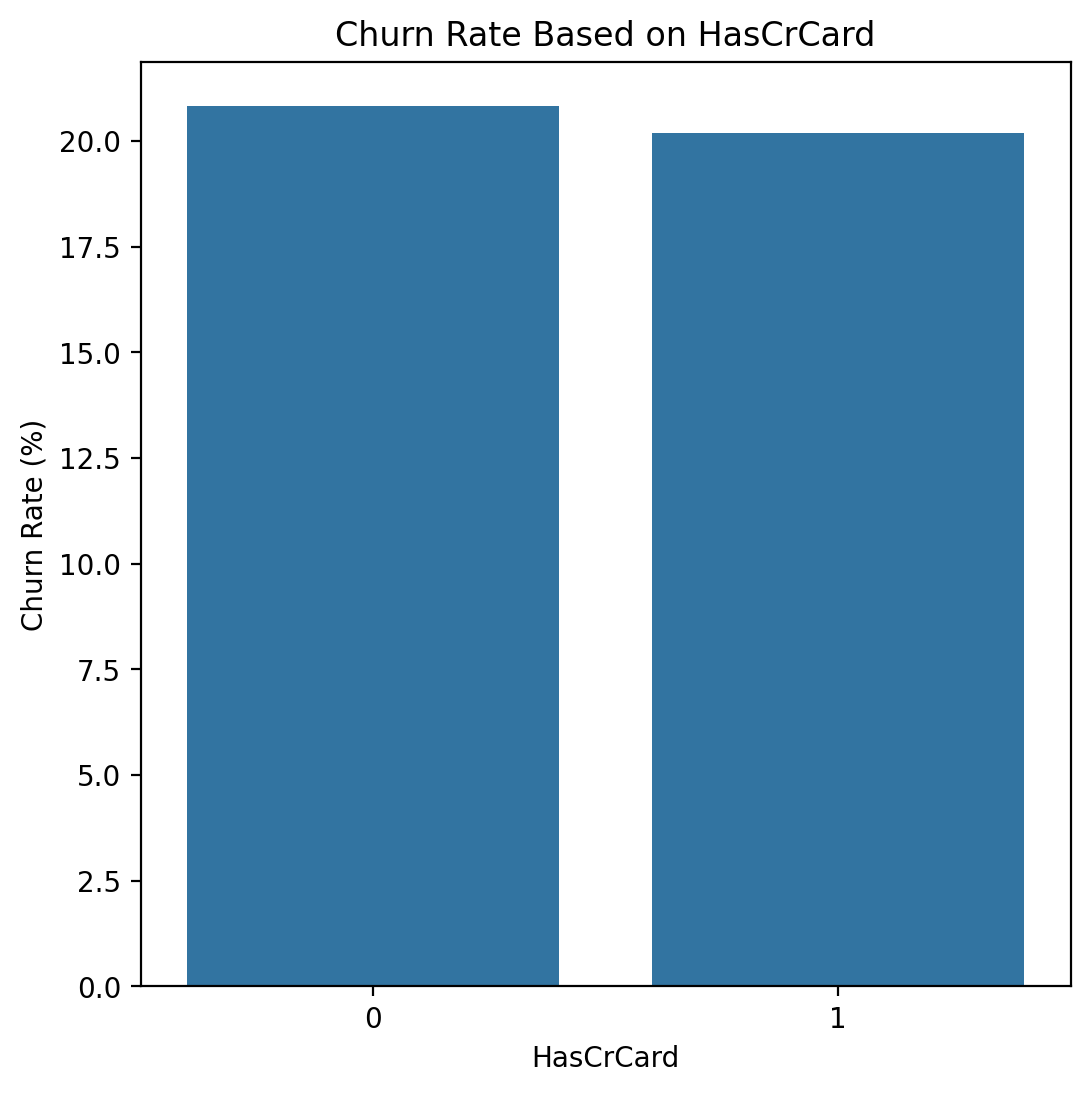

In [ ]:
# Churn rate based on HasCrCard
plt.figure(figsize=(6, 6))
sns.barplot(x='HasCrCard', y='Exited', data=df, estimator=lambda x: sum(x) / len(x) * 100, errorbar=None)
plt.title('Churn Rate Based on HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('Churn Rate (%)')
plt.show()

###4) is active member

In [ ]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

IsActiveMember
1    4416
0    3547
Name: count, dtype: int64

In [ ]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

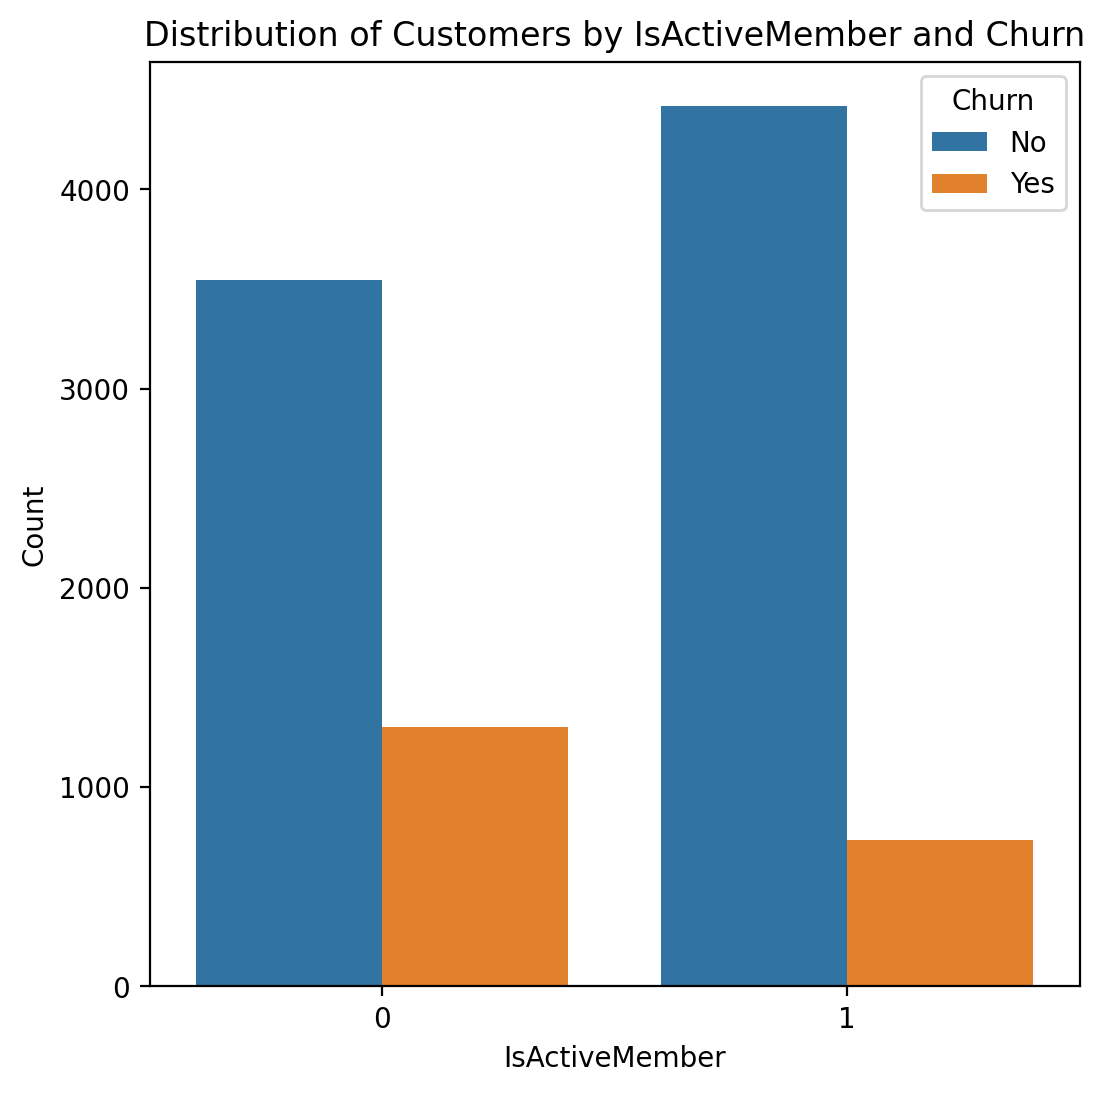

In [ ]:
# Distribution of customers based on IsActiveMember with churn information
plt.figure(figsize=(6, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Distribution of Customers by IsActiveMember and Churn')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

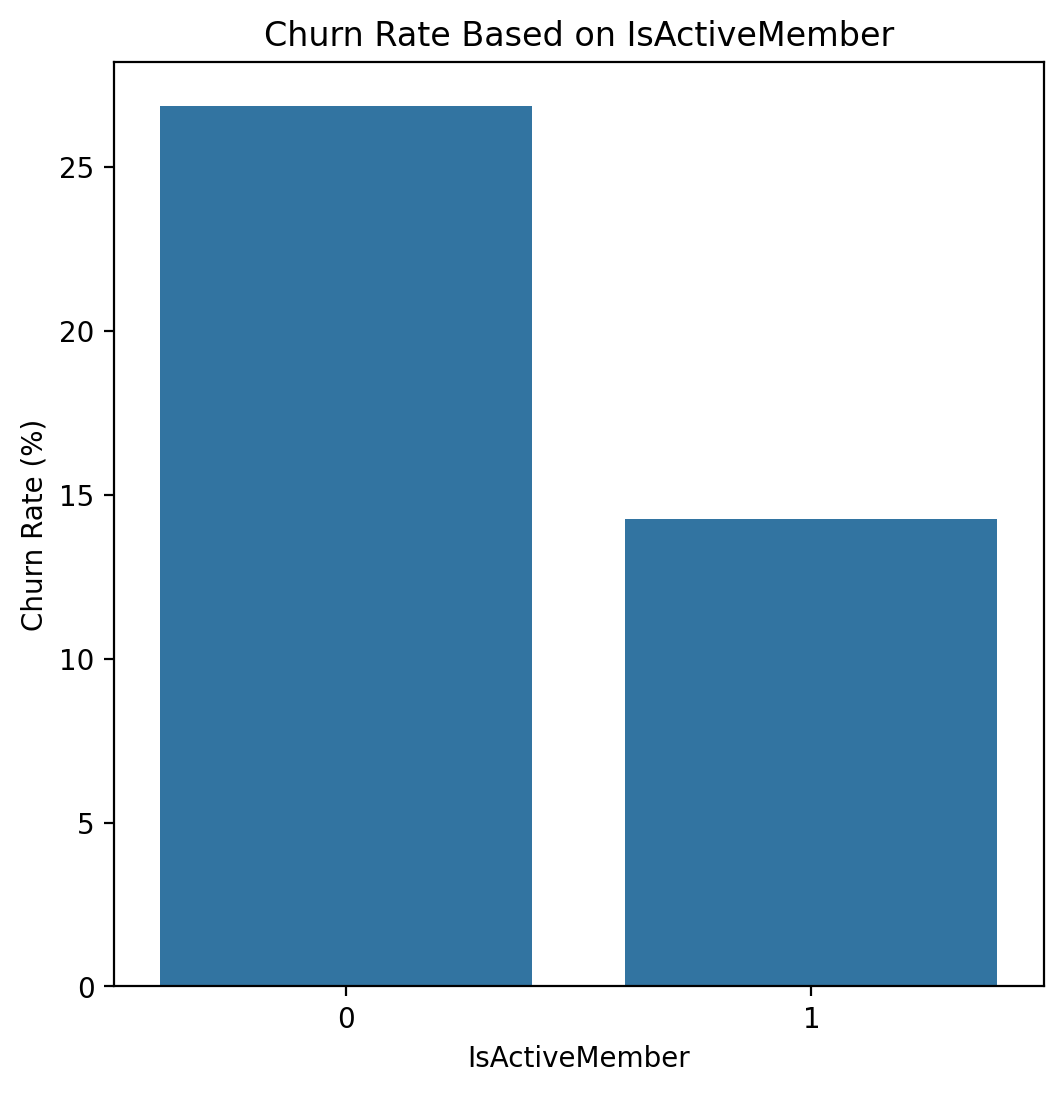

In [ ]:
# Churn rate based on IsActiveMember
plt.figure(figsize=(6, 6))
sns.barplot(x='IsActiveMember', y='Exited', data=df, estimator=lambda x: sum(x) / len(x) * 100, errorbar=None)
plt.title('Churn Rate Based on IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Churn Rate (%)')
plt.show()

###5) geography

In [ ]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

Geography
Germany    1695
Spain      2064
France     4204
Name: count, dtype: int64

In [ ]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

Geography
Spain      413
France     810
Germany    814
Name: count, dtype: int64

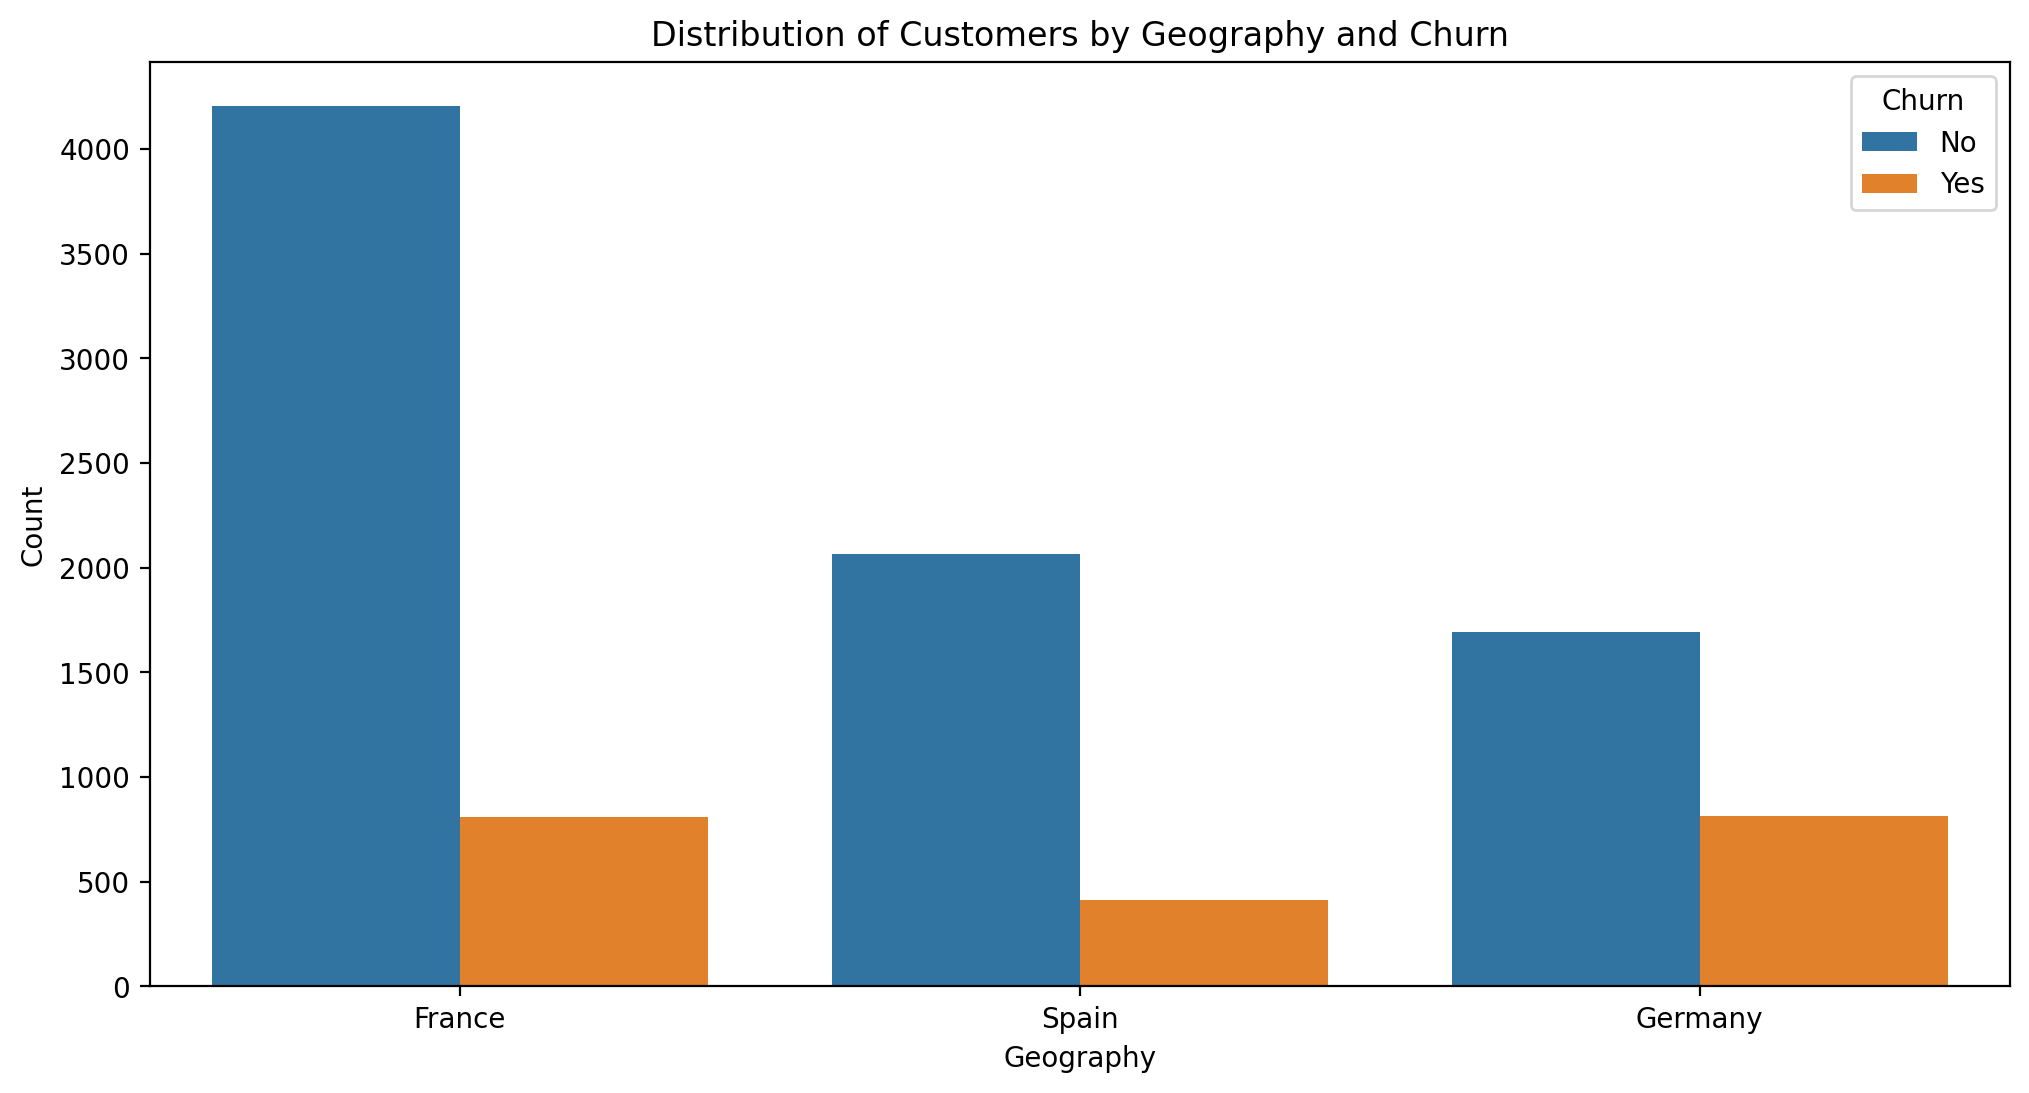

In [ ]:
# Distribution of customers based on geography with churn information
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Distribution of Customers by Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

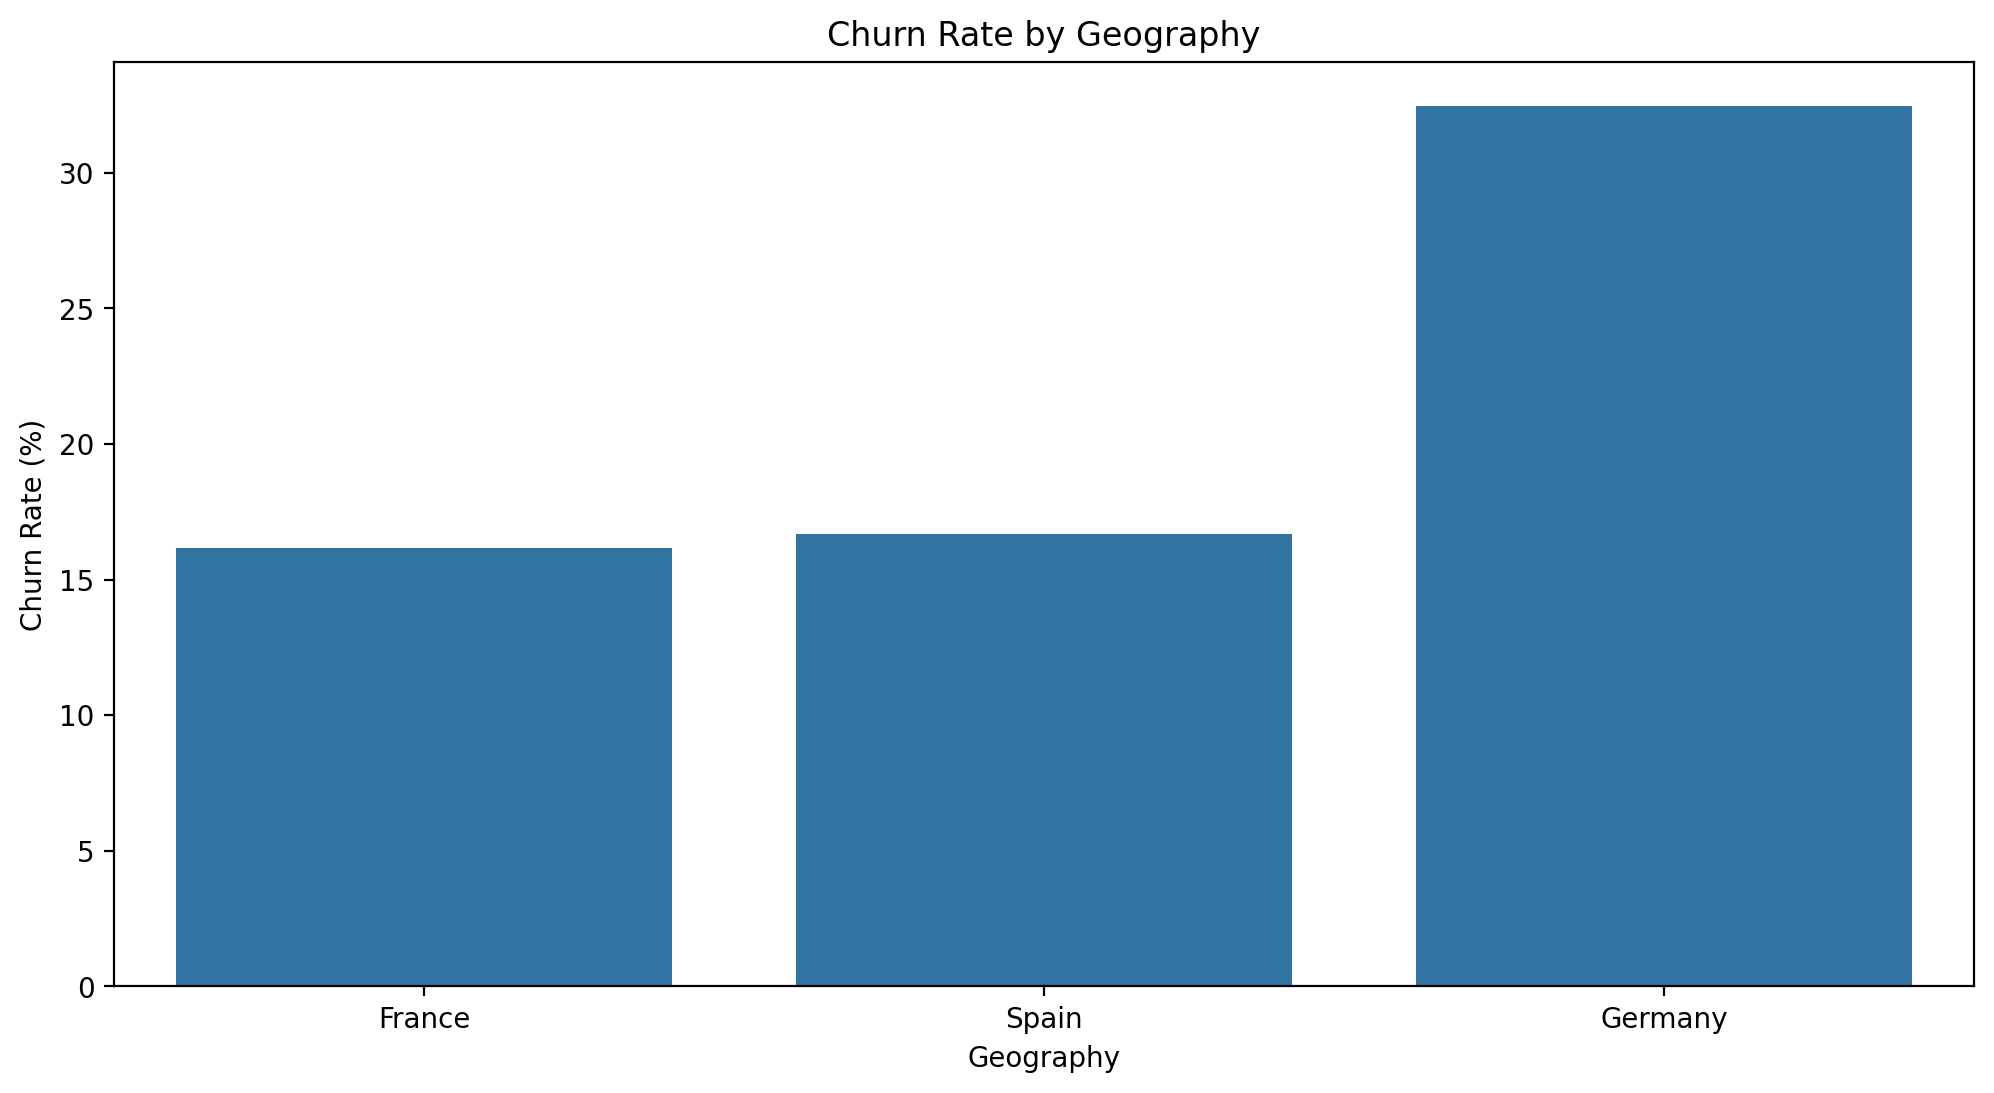

In [ ]:
# Churn rate based on geography
plt.figure(figsize=(12, 6))
sns.barplot(x='Geography', y='Exited', data=df, estimator=lambda x: sum(x) / len(x) * 100, errorbar=None)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')
plt.show()

###6) Gender

In [ ]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [ ]:
# Frequency of churn group according to Gender
churn.Gender.value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

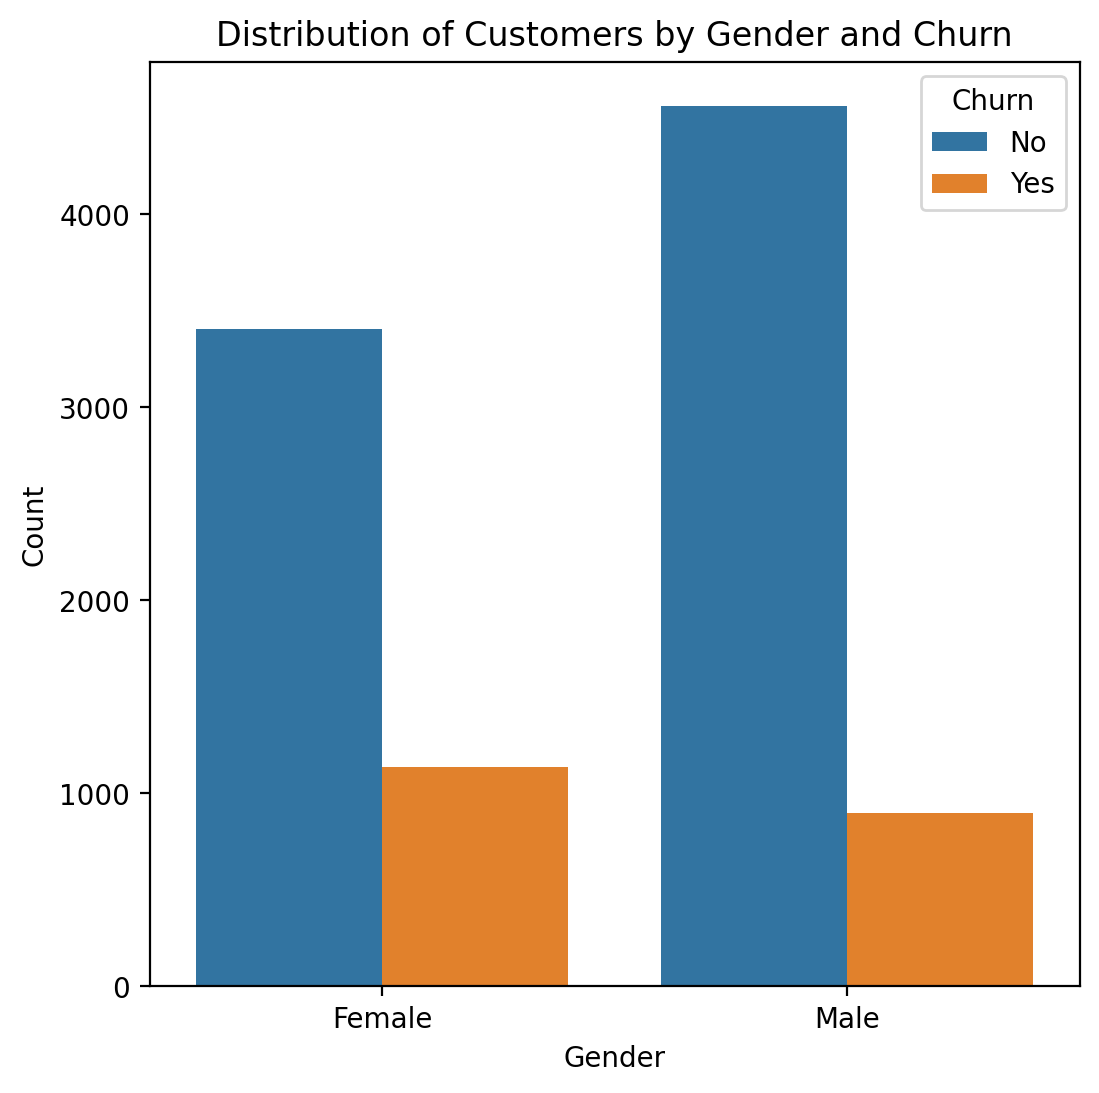

In [ ]:
# Distribution of customers based on gender with churn information
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Distribution of Customers by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

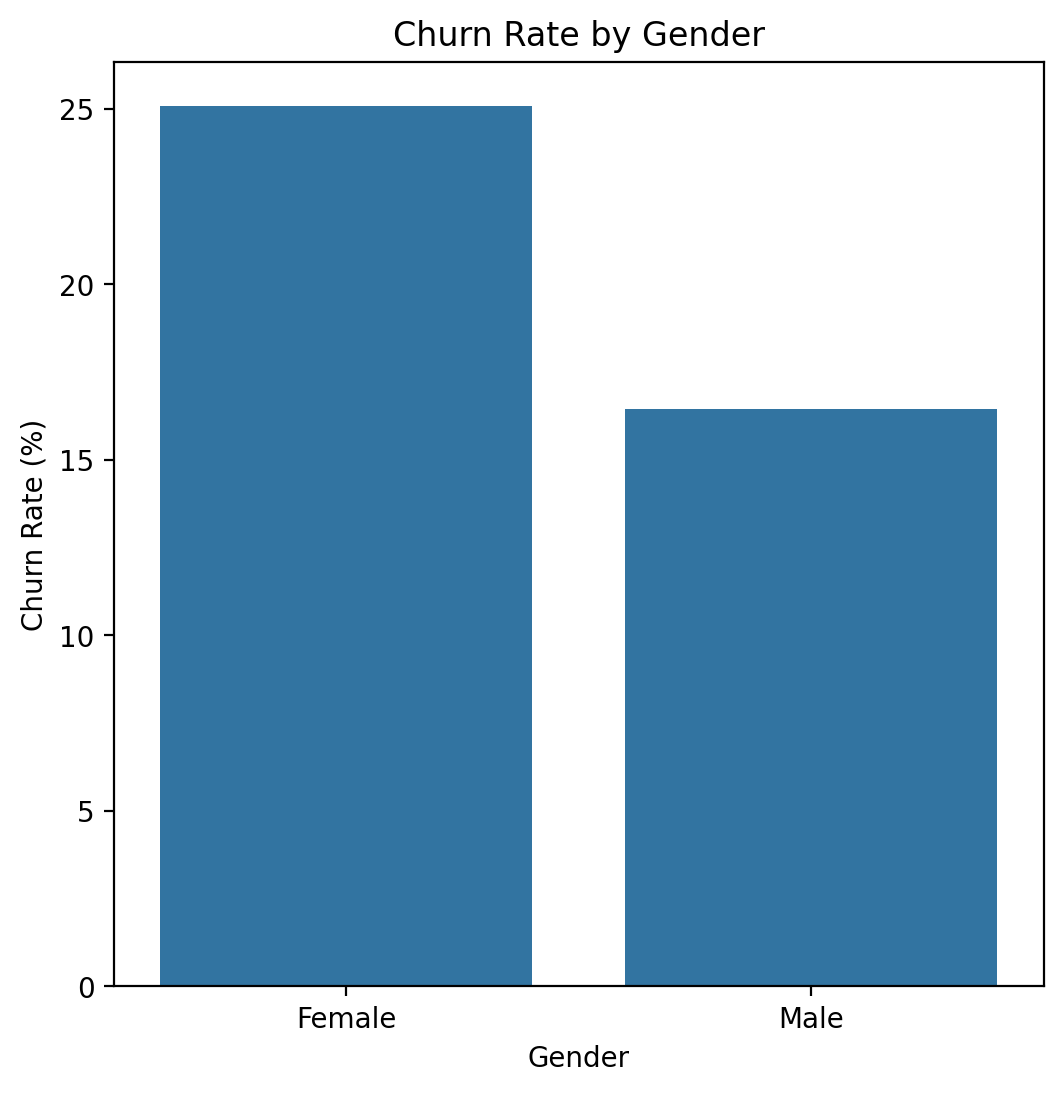

In [ ]:
# Churn rate based on gender
plt.figure(figsize=(6, 6))
sns.barplot(x='Gender', y='Exited', data=df, estimator=lambda x: sum(x) / len(x) * 100, errorbar=None)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.show()

##Numerical variables Analysis

###1) Credit Score

In [ ]:
# Let's examine the credit score of the not_churn group
not_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
5%        492.000000
25%       585.000000
50%       653.000000
75%       718.000000
90%       778.000000
95%       812.000000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

In [ ]:
# Let's examine the credit score of the churn group
churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
5%        479.000000
25%       578.000000
50%       646.000000
75%       716.000000
90%       776.400000
95%       812.200000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

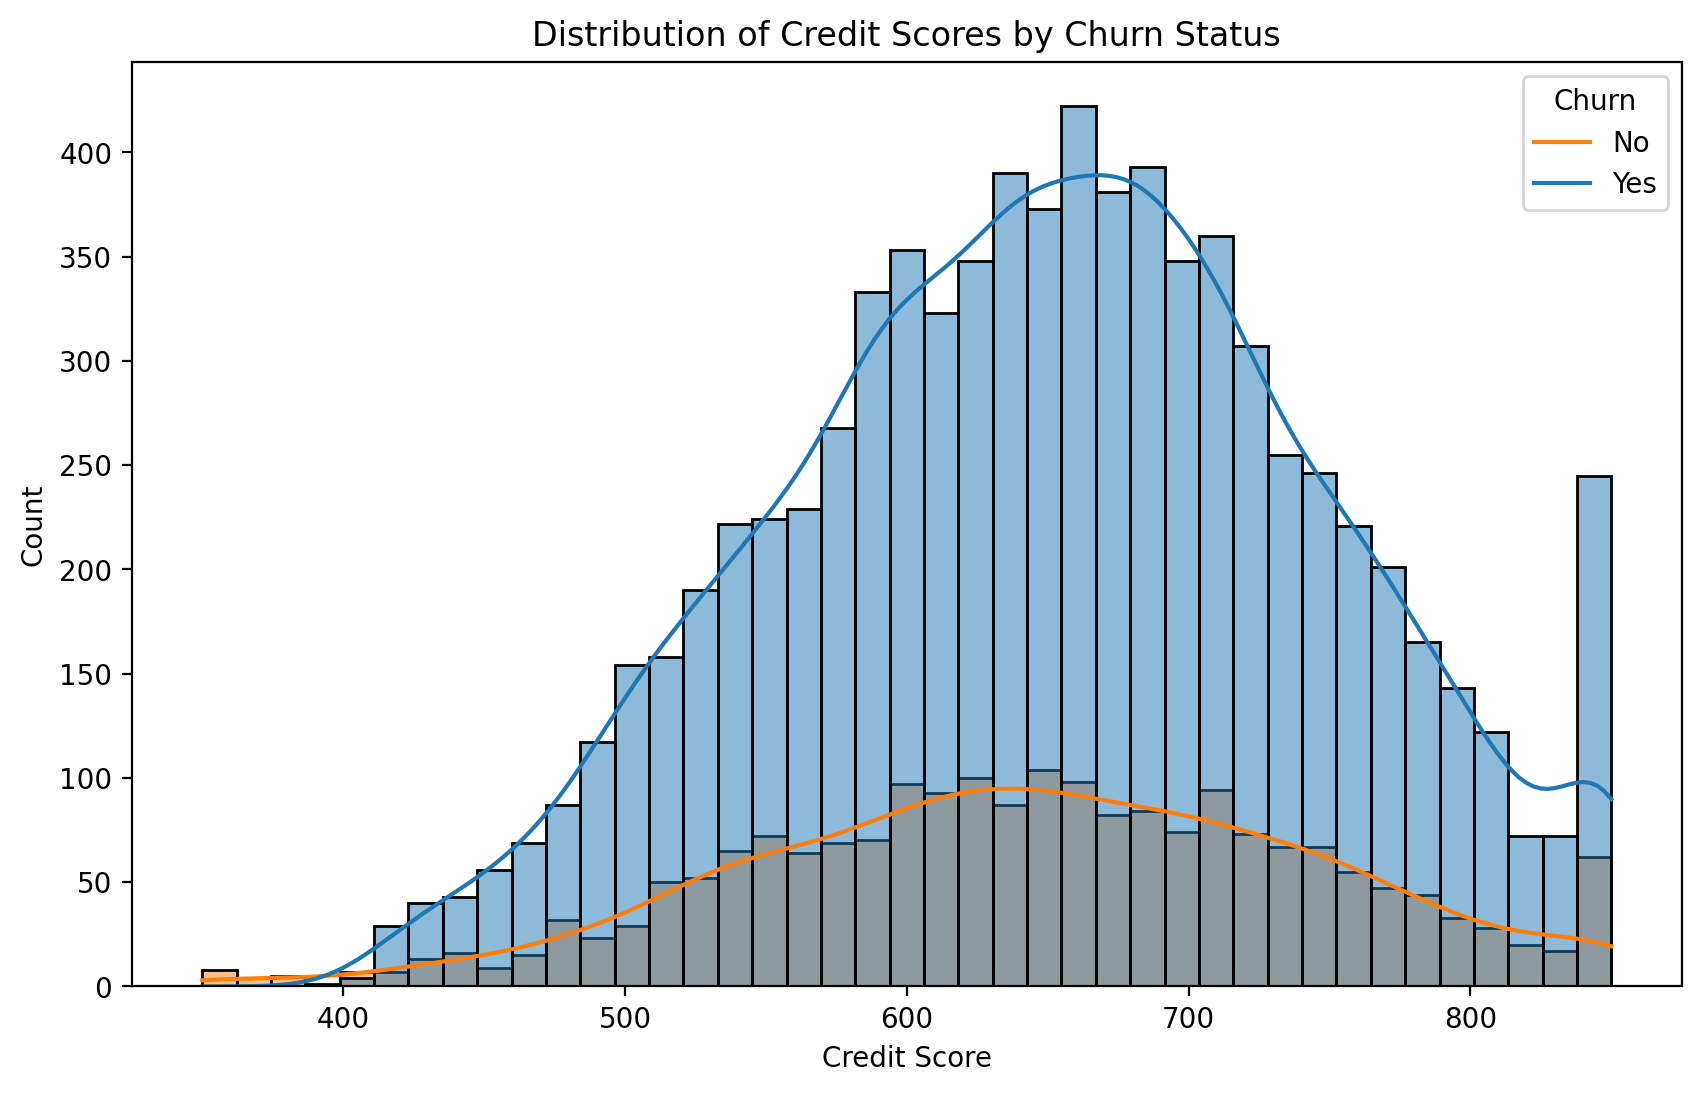

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='CreditScore', data=df, hue='Exited', kde=True)
plt.title('Distribution of Credit Scores by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

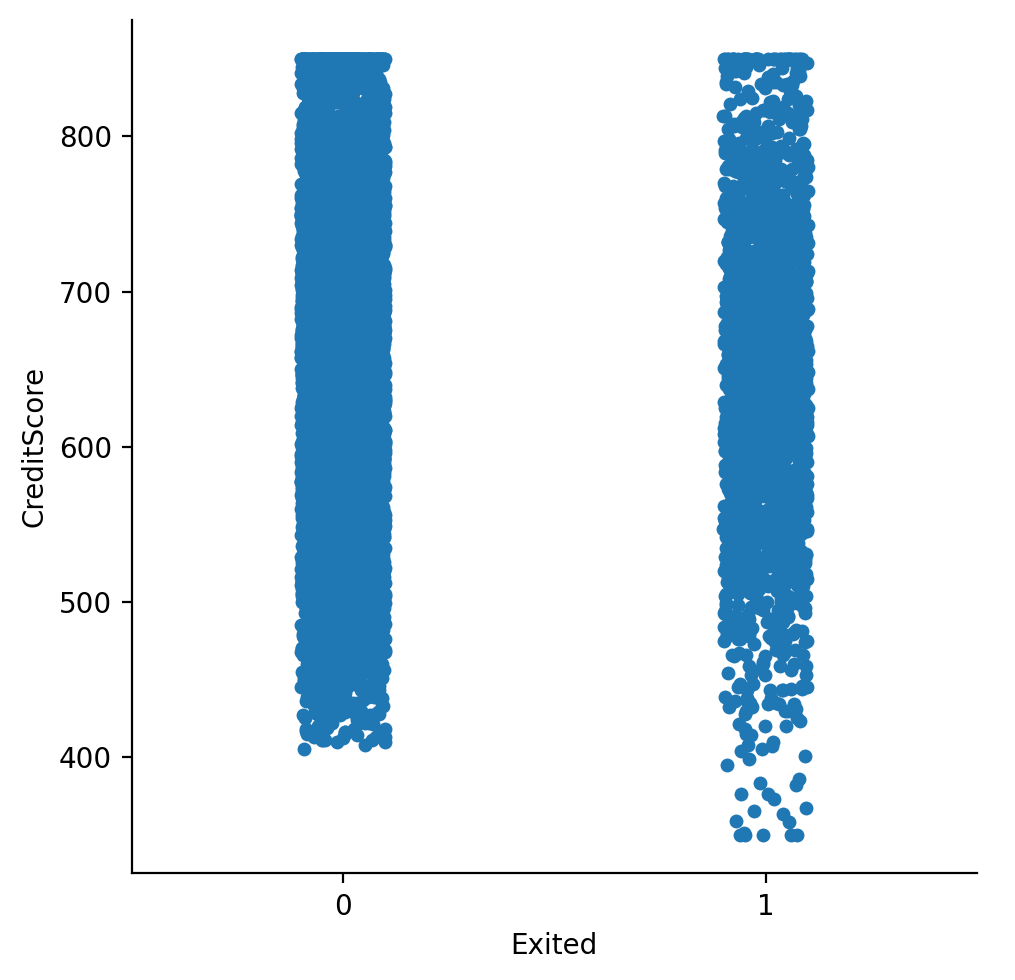

In [ ]:
sns.catplot(x="Exited", y="CreditScore", data=df)

###2) Age

In [ ]:
# examining the age of the not_churn group
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
5%         24.000000
25%        31.000000
50%        36.000000
75%        41.000000
90%        49.000000
95%        59.000000
99%        73.000000
max        92.000000
Name: Age, dtype: float64

In [ ]:
# examine the age of the churn group
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
5%         29.000000
25%        38.000000
50%        45.000000
75%        51.000000
90%        58.000000
95%        61.000000
99%        68.000000
max        84.000000
Name: Age, dtype: float64

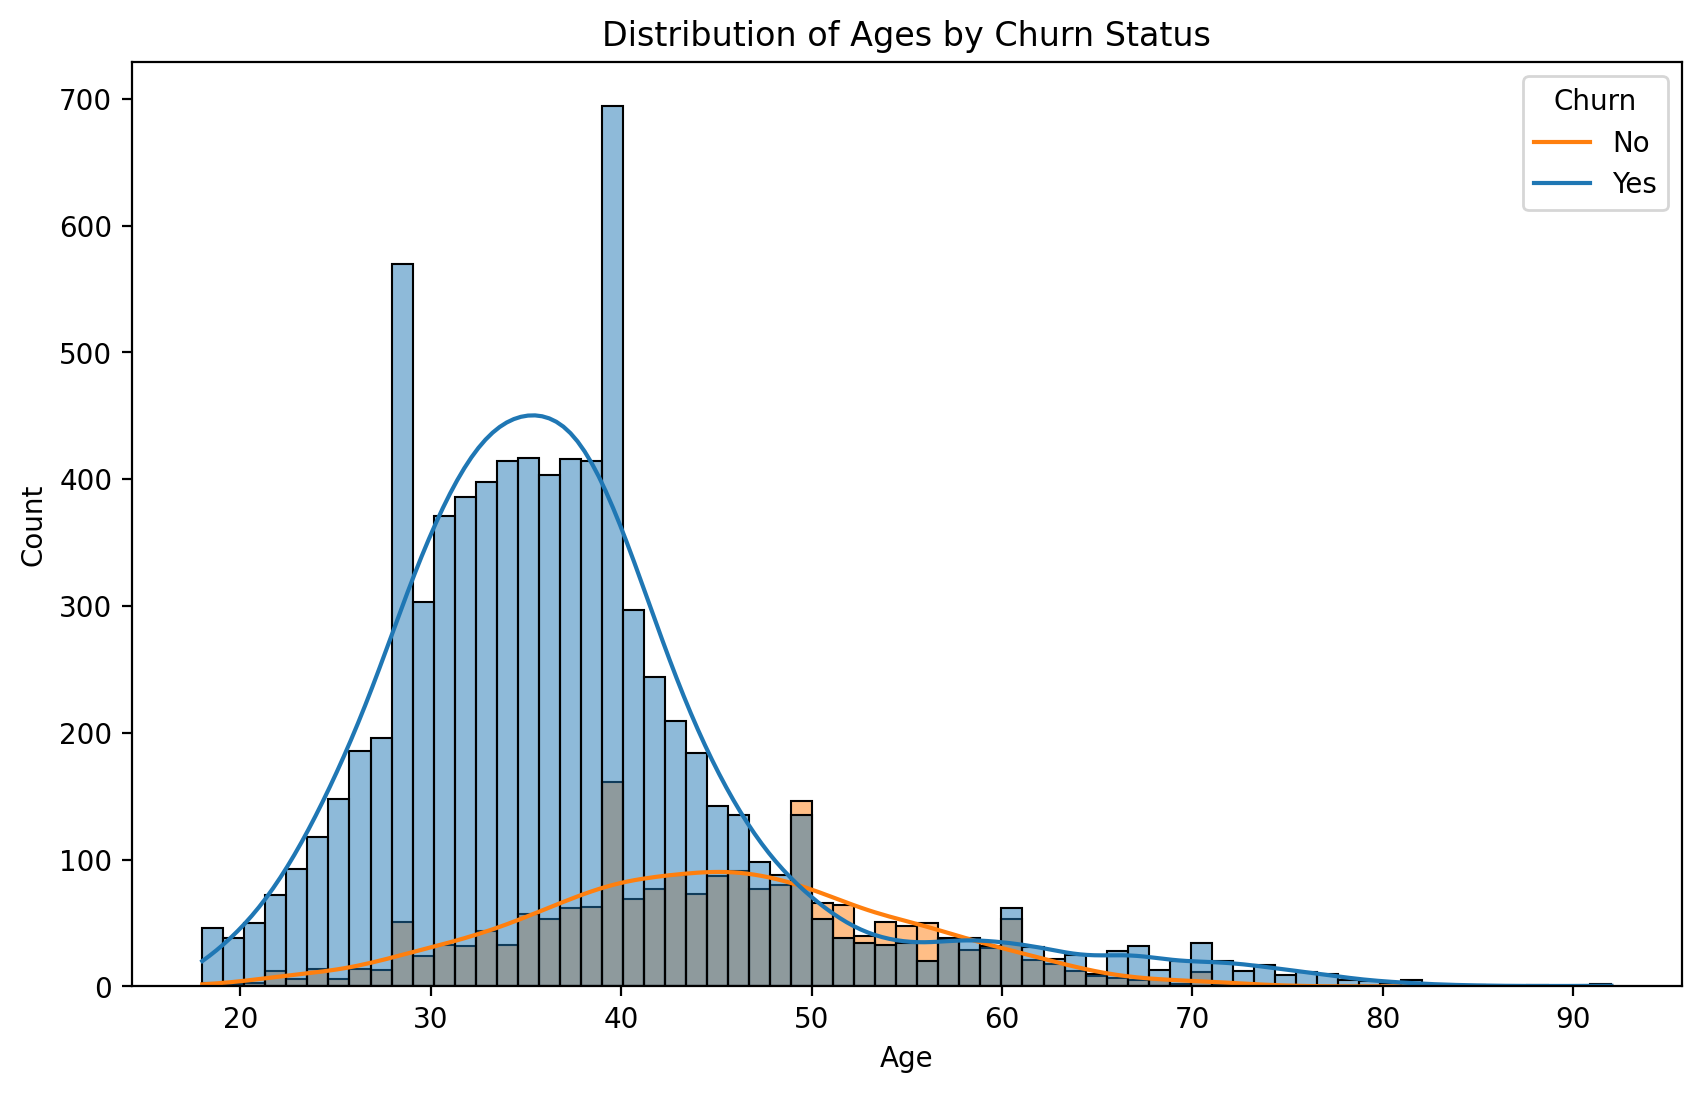

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, hue='Exited', kde=True)
plt.title('Distribution of Ages by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

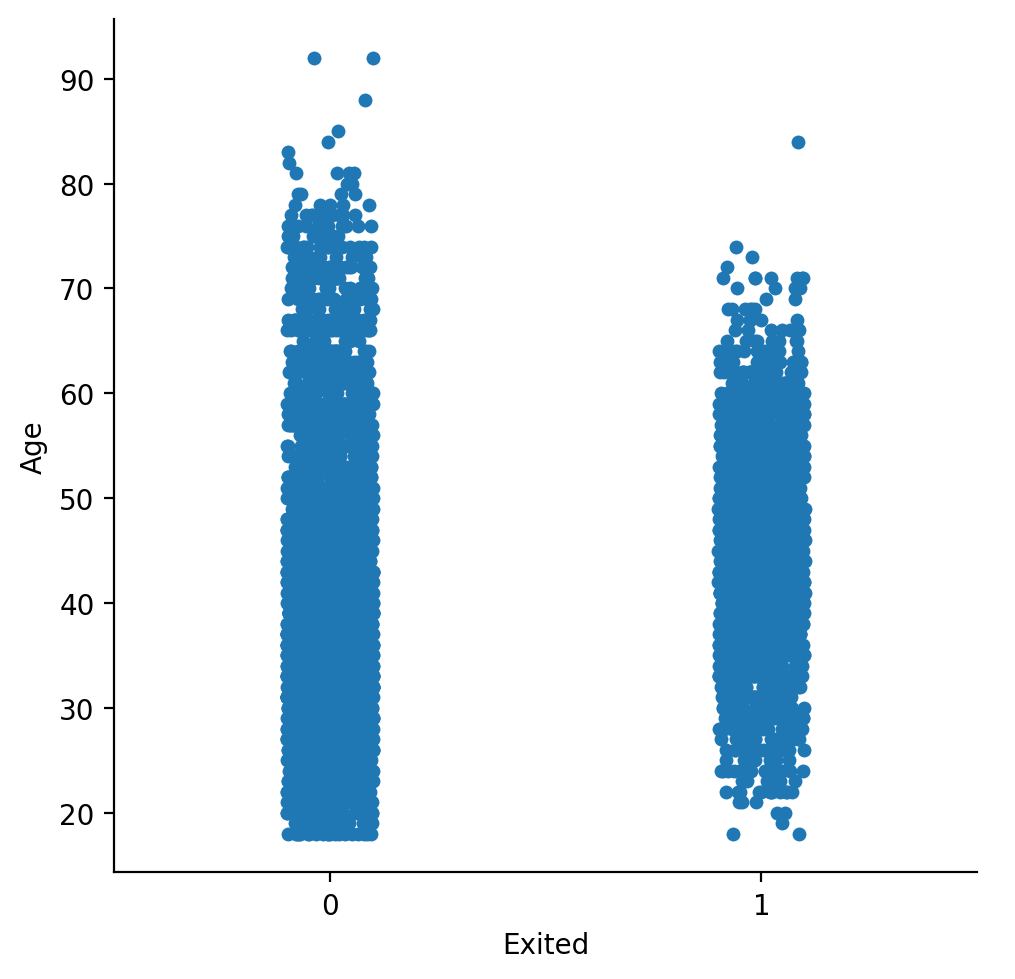

In [ ]:
sns.catplot(x="Exited", y="Age", data = df)

###3) Balance

In [ ]:
# examining the Balance of the not_churn group
not_churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
5%            0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
90%      148730.298000
95%      161592.595000
99%      183753.906200
max      221532.800000
Name: Balance, dtype: float64

In [ ]:
# examining the Balance of the churn group
churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
5%            0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
90%      152080.618000
95%      167698.240000
99%      197355.288400
max      250898.090000
Name: Balance, dtype: float64

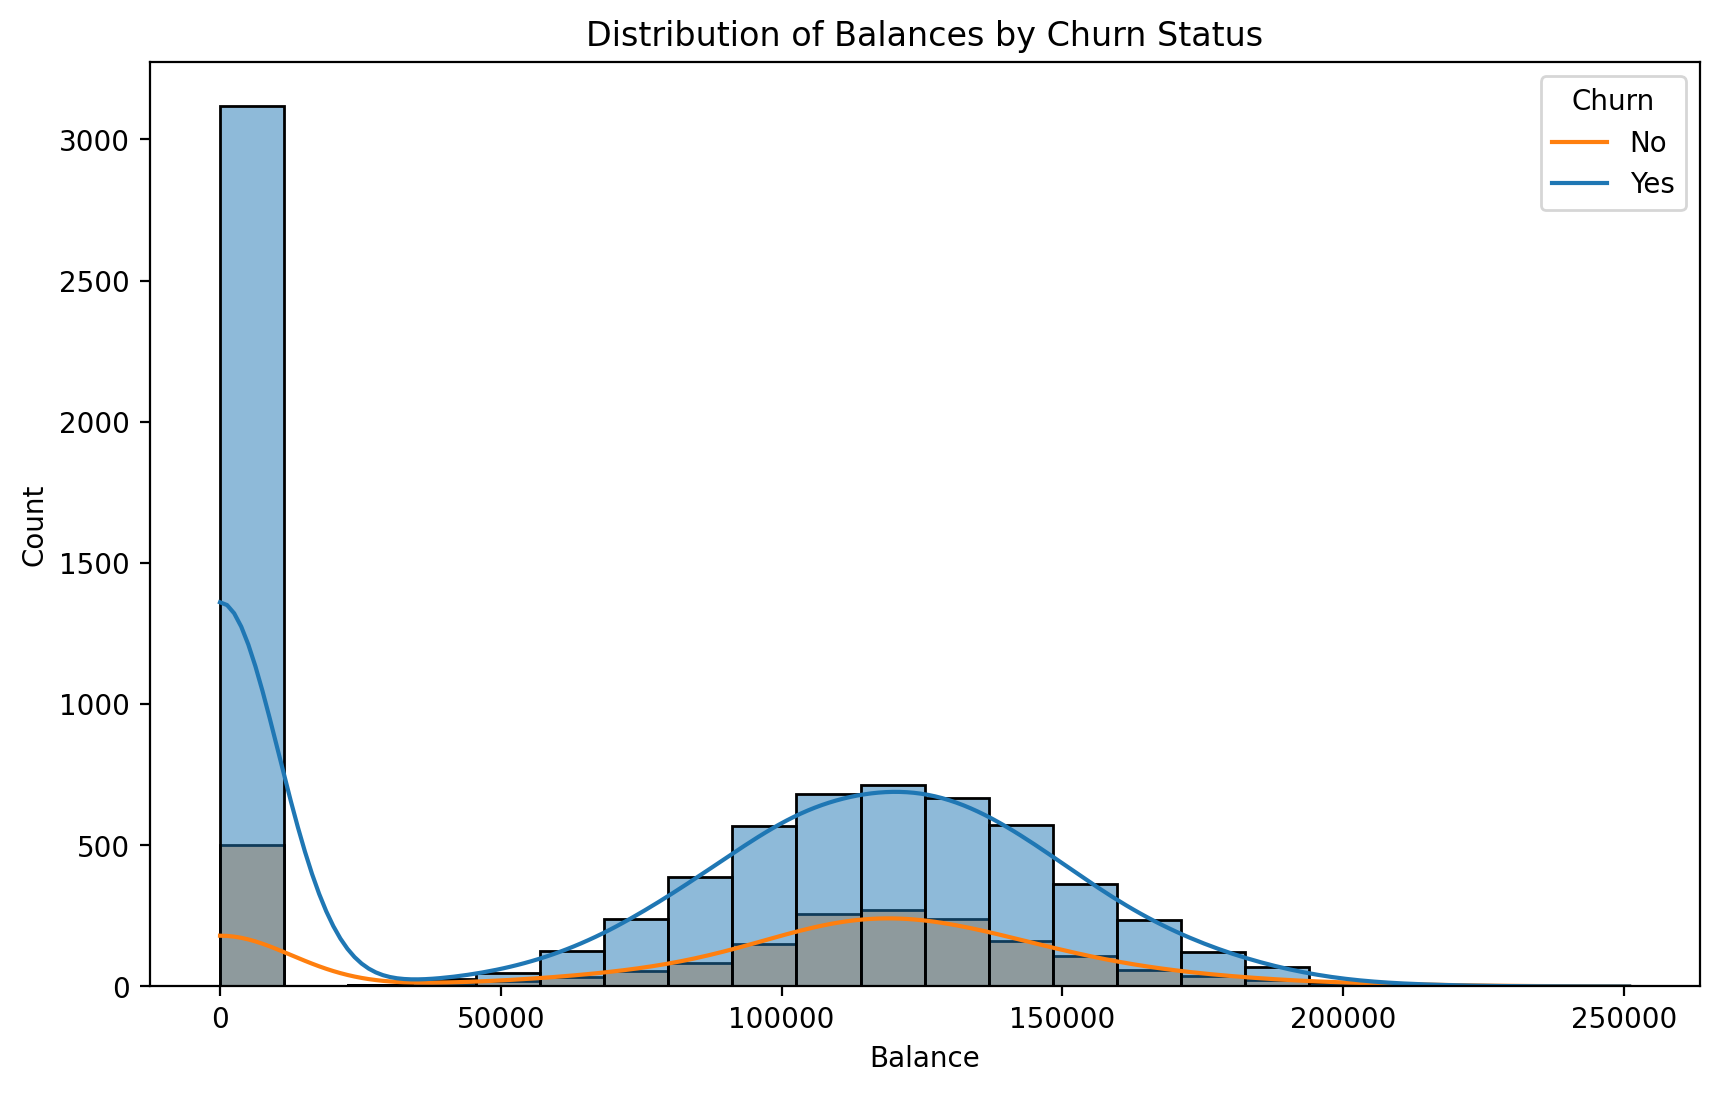

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Balance', data=df, hue='Exited', kde=True)
plt.title('Distribution of Balances by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

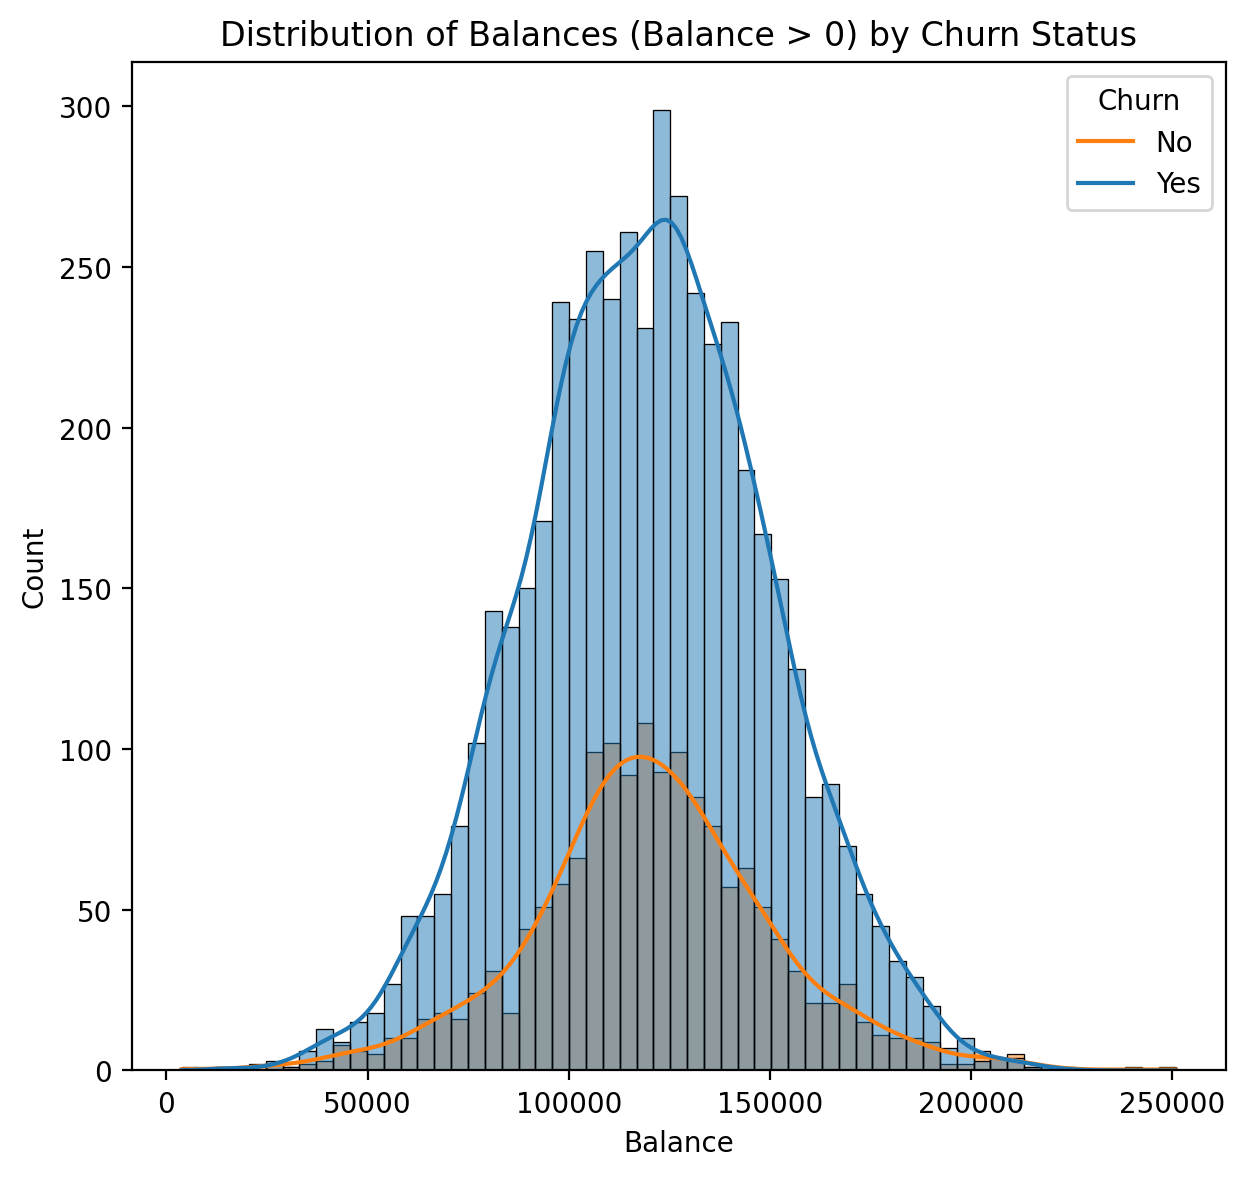

In [ ]:
# Filter data with balance greater than 0
balance_nonzero = df[df['Balance'] > 0]

# Create histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Balance', data=balance_nonzero, hue='Exited', kde=True)
plt.title('Distribution of Balances (Balance > 0) by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

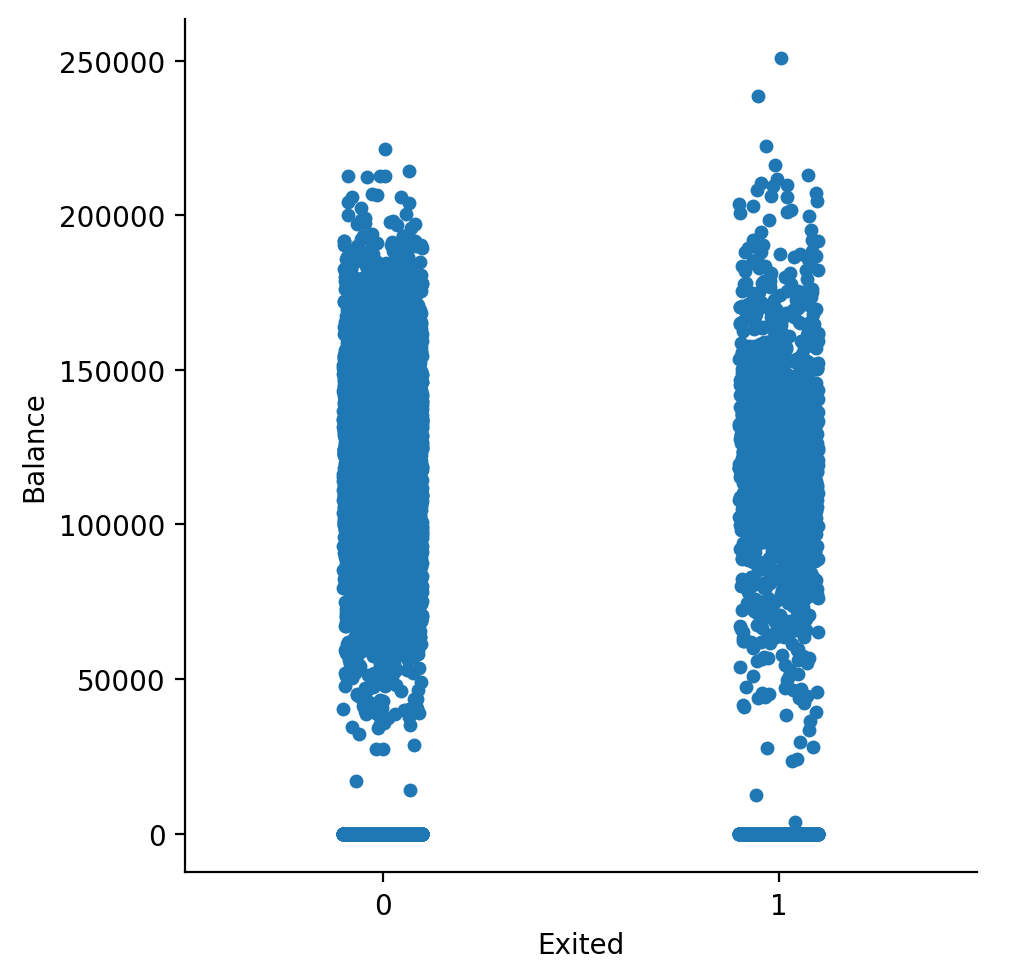

In [ ]:
sns.catplot(x="Exited", y="Balance", data = df)

###4) Estimated Salary

In [ ]:
# examining the EstimatedSalary of the not_churn group
not_churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
5%         9773.542000
25%       50783.490000
50%       99645.040000
75%      148609.955000
90%      179453.212000
95%      190107.557000
99%      198131.465200
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
# examining the EstimatedSalary of the churn group
churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
5%        10030.760000
25%       51907.720000
50%      102460.840000
75%      152422.910000
90%      180169.390000
95%      190328.982000
99%      197717.297600
max      199808.100000
Name: EstimatedSalary, dtype: float64

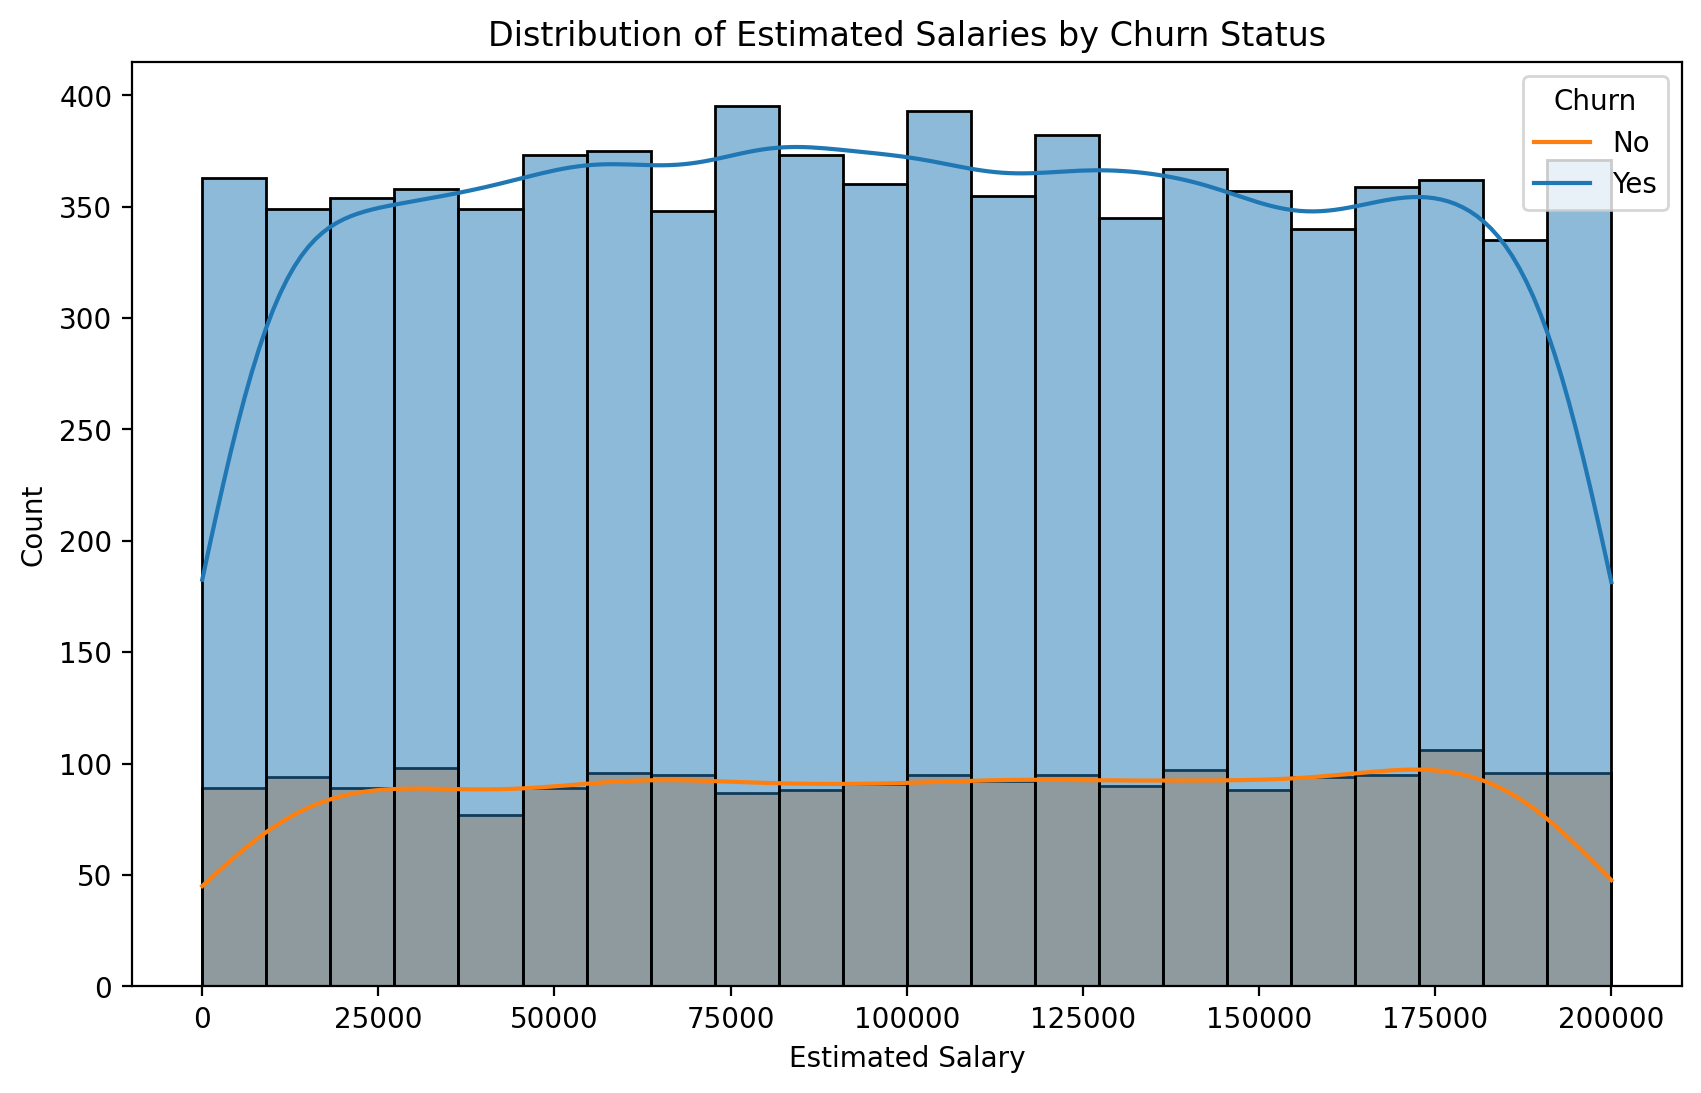

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='EstimatedSalary', data=df, hue='Exited', kde=True)
plt.title('Distribution of Estimated Salaries by Churn Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

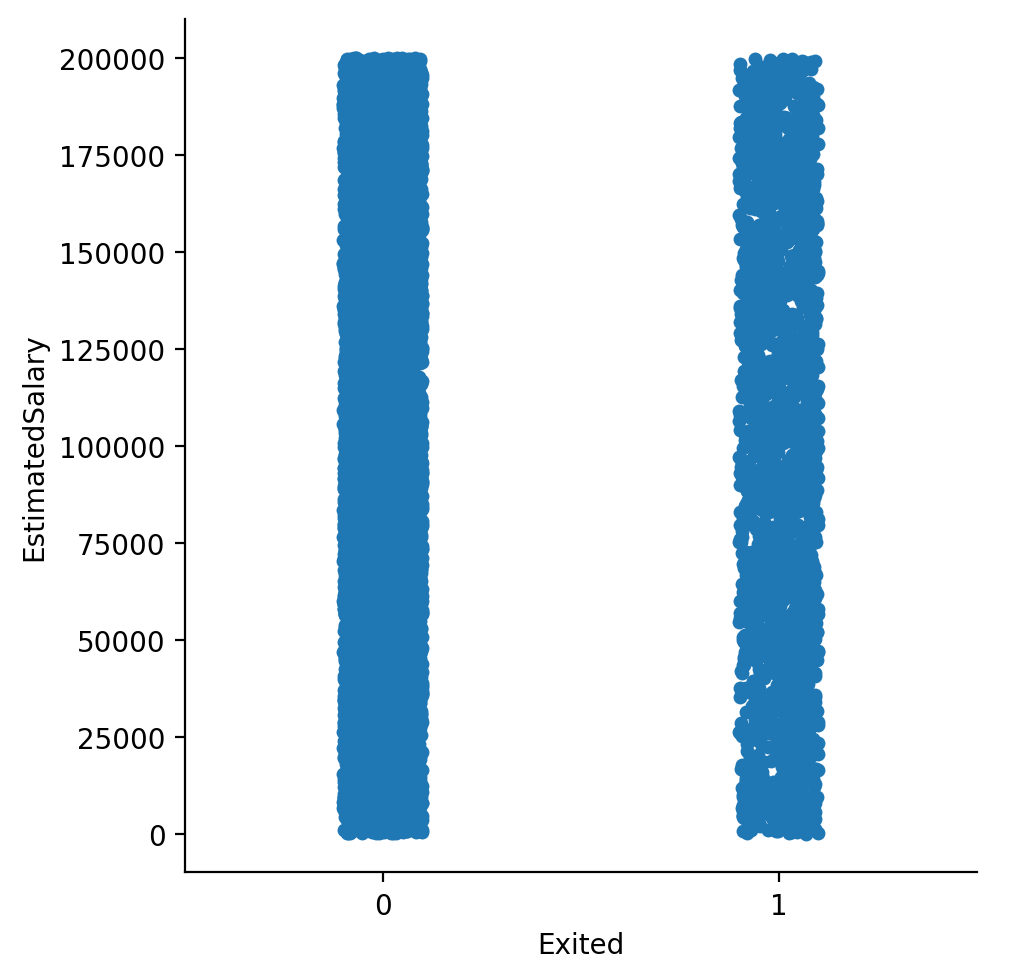

In [ ]:
sns.catplot(x="Exited", y="EstimatedSalary", data = df)

##Data processing


###Missing value

In [ ]:
# # Missing Observation Analysis
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##Outliers

In [ ]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [ ]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


##One hot encoding

In [ ]:
# Variables to apply one hot encoding
list = ["Gender", "Geography"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [ ]:
# Removing variables that will not affect the dependent variable
df = df.drop(["CustomerId","Surname"], axis = 1)


In [ ]:
# Standardize the numerical columns
df_standardized = df.copy()
mean_credit_score = df['CreditScore'].mean()
std_credit_score = df['CreditScore'].std()

mean_age = df['Age'].mean()
std_age = df['Age'].std()

mean_balance = df['Balance'].mean()
std_balance = df['Balance'].std()

mean_salary = df['EstimatedSalary'].mean()
std_salary = df['EstimatedSalary'].std()

df_standardized['CreditScore'] = (df['CreditScore'] - mean_credit_score) / std_credit_score
df_standardized['Age'] = (df['Age'] - mean_age) / std_age
df_standardized['Balance'] = (df['Balance'] - mean_balance) / std_balance
df_standardized['EstimatedSalary'] = (df['EstimatedSalary'] - mean_salary) / std_salary


df = df_standardized
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,
1,-0.326205,0.293503,2,-1.225786,1,1,1,0.021885,1,False,False,False
2,-0.440014,0.198154,1,0.117344,1,0,1,0.216523,0,False,False,True
3,-1.536717,0.293503,8,1.332987,3,1,0,0.240675,1,False,False,False
4,0.501496,0.007456,1,-1.225786,2,0,0,-0.108912,0,False,False,False
5,2.063781,0.388852,2,0.785689,1,1,1,-0.365258,0,False,False,True


Corelation matrix

<Axes: >

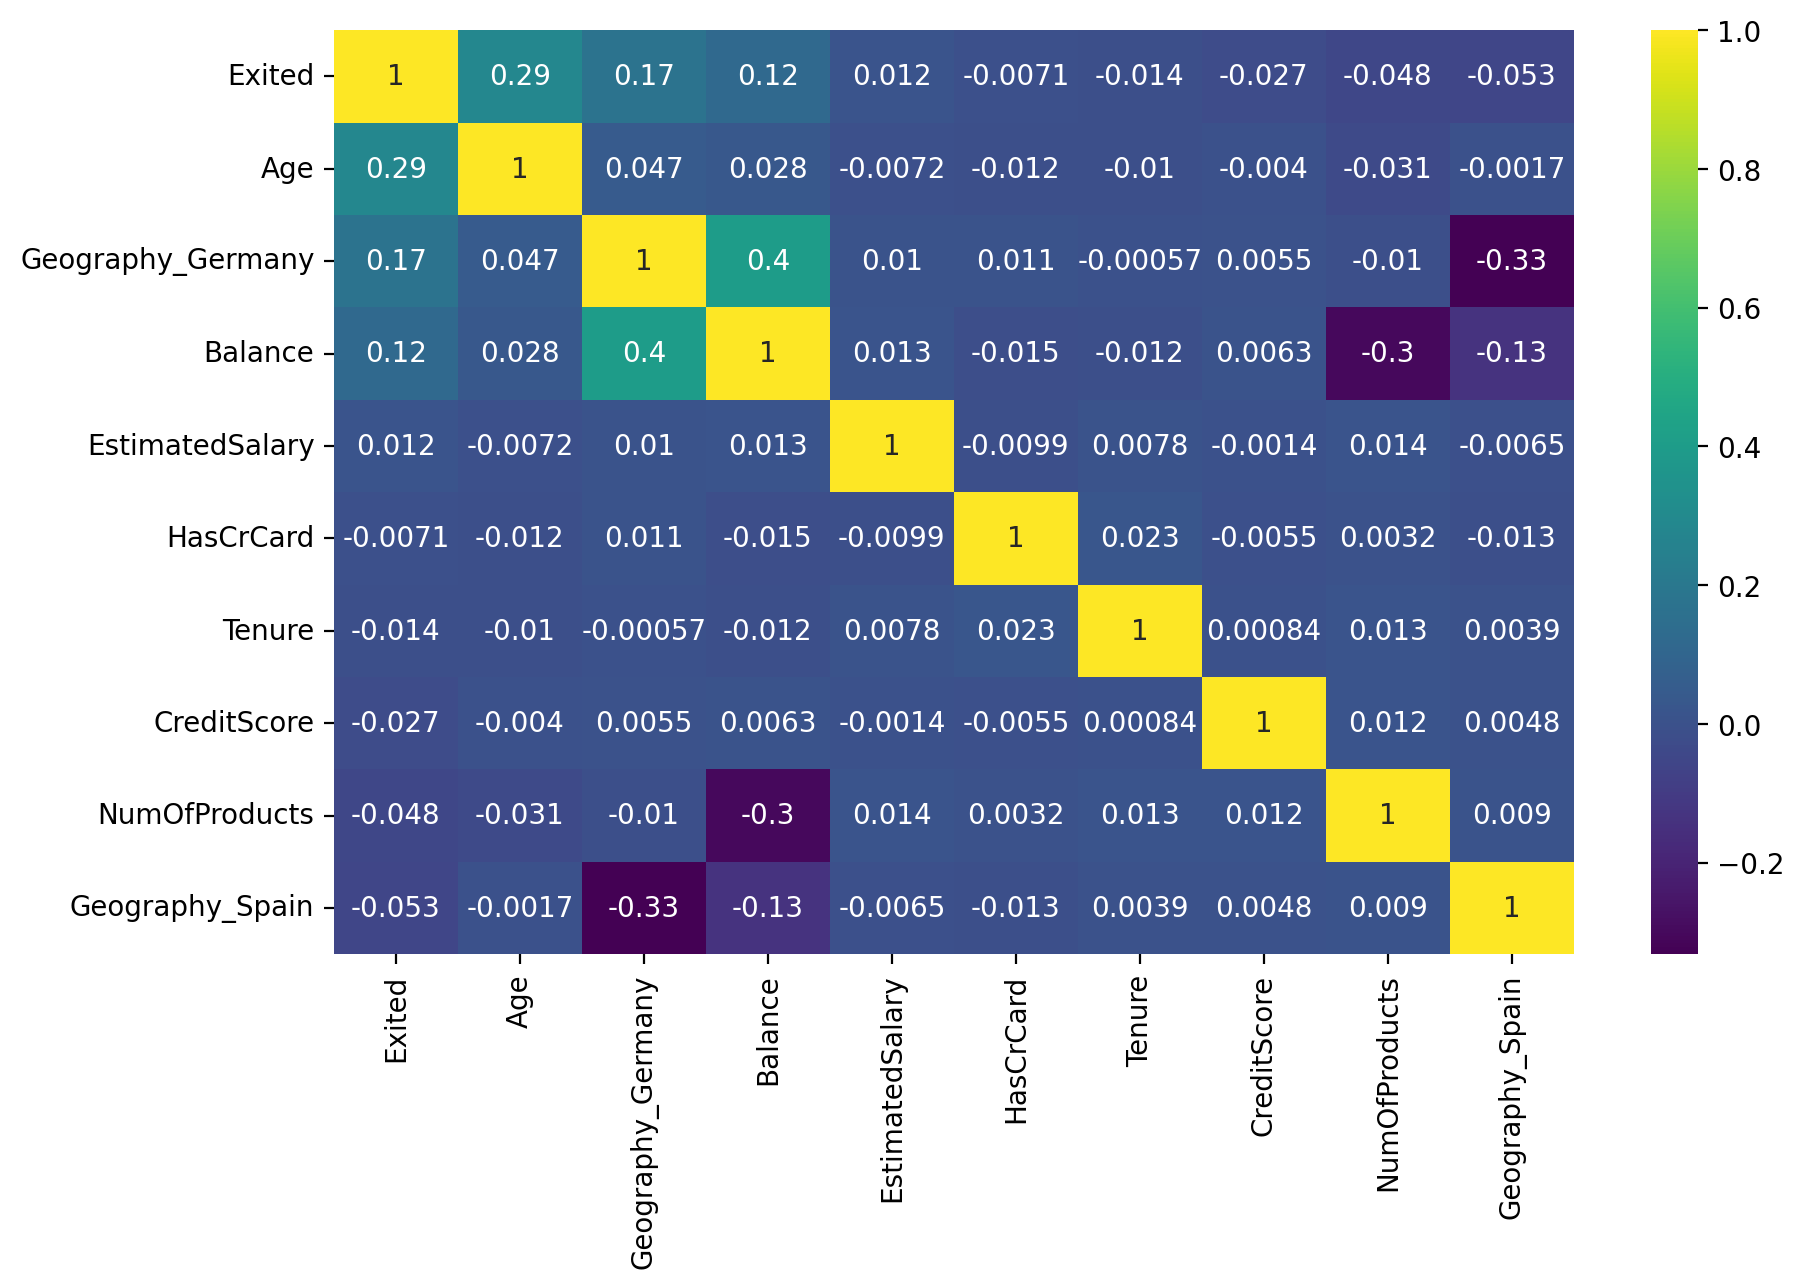

In [ ]:
# Exited correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

##Logistic Regression

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
def myClassificationReport(y_pred, y_test):
    print("---- Logistic regression classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)

def sigmoid(x):
    x=np.array(x,dtype=np.float32)
    return 1/(1+np.exp(-x))

class myLogisticRegression():
    def __init__(self, lr=0.0001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

X_te=X_te.to_numpy()
y_te=y_te.to_numpy()
X_tr=X_tr.to_numpy()
y_tr=y_tr.to_numpy()
X_te = X_te.astype(np.float64)

start_time = time.time()
clf = myLogisticRegression(lr=0.1)
clf.fit(X_tr,y_tr)
y_pred = clf.predict(X_te)
end_time = time.time()

print("Time Taken to execute :", end_time - start_time, "sec")

myClassificationReport(y_pred, y_te)

KeyboardInterrupt: 

## Logistic Regression(lib)

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
print(classification_report(y_te, y_pred))

## Naive Bayes

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
def myClassificationReport(y_pred, y_test):
    print("---- Naive Bayes classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)

class myNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

nb = myNaiveBayes()
X_te=X_te.to_numpy()
y_te=y_te.to_numpy()
X_tr=X_tr.to_numpy()
y_tr=y_tr.to_numpy()
X_te = X_te.astype(np.float64)

start_time = time.time()
nb.fit(X_tr, y_tr)
y_pred = nb.predict(X_te)
end_time = time.time()

print("Time Taken to execute :", end_time - start_time, "sec")

myClassificationReport(y_pred, y_te)

## Naive Bayes(lib)

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
model = GaussianNB()
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
print(classification_report(y_te, y_pred))

## KNN

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
def myClassificationReport(y_pred, y_test):
    print("--- KNN classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)


def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class myKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
# cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
# plt.figure()
# plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
# plt.show()
X_te=X_te.to_numpy()
y_te=y_te.to_numpy()
X_tr=X_tr.to_numpy()
y_tr=y_tr.to_numpy()

start_time = time.time()
clf = myKNN(k=5)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
end_time = time.time()

print("Time Taken to execute :", end_time - start_time, "sec")

myClassificationReport(y_pred, y_te)

## KNN(lib)

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
print(classification_report(y_te, y_pred))

## SVM

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
def myClassificationReport(y_pred, y_test):
    print("---- SVM classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        self.w = self.w.astype(np.float64)
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

X_te=X_te.to_numpy()
y_te=y_te.to_numpy()
X_tr=X_tr.to_numpy()
y_tr=y_tr.to_numpy()
X_te = X_te.astype(np.float64)
y_te=y_te.astype(np.float64)
X_tr=X_tr.astype(np.float64)
y_tr=y_tr.astype(np.float64)

start_time = time.time()
clf = SVM()
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)
end_time = time.time()

print("Time Taken to execute :", end_time - start_time, "sec")

# y_pred = np.where(y_pred == -1, 0, y_pred)
myClassificationReport(y_pred, y_te)

Time Taken to execute : 76.43391442298889 sec
---- SVM classification report ----
Accuracy: 0.0
Precision: 0
Recall: 0
F1 Score: 0


## SVM(lib)

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
def myClassificationReport(y_pred, y_test):
    print("---- SVM classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)

svm_classifier = SVC(kernel="linear")
# y_tr = np.where(y_tr <= 0, -1, 1)
svm_classifier.fit(X_tr, y_tr)
y_pred = svm_classifier.predict(X_te)
# y_pred = np.where(y_pred == -1, 0, y_pred)
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1573
           1       0.00      0.00      0.00       427

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.69      2000



## Decision tree classifier

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)


In [ ]:
def myClassificationReport(y_pred, y_test):
    print("---- Decision tree classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)

class DTC:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.min_samples_split = 2
    def gini_impurity(y):
        n_samples = len(y)
        if n_samples == 0:
            return 0

        y_sorted = y[y[:, 0].argsort()]

        split_points = (y_sorted[:-1, 0] + y_sorted[1:, 0]) / 2

        min_gini = float('inf')
        best_split_point = None

        for split_point in split_points:
            left_indices = y_sorted[:, 0] <= split_point
            right_indices = ~left_indices

            left_gini = DTC.gini_impurity_helper(y_sorted[left_indices, 1])
            right_gini = DTC.gini_impurity_helper(y_sorted[right_indices, 1])

            weighted_gini = (len(y_sorted[left_indices]) * left_gini + len(y_sorted[right_indices]) * right_gini) / n_samples

            if weighted_gini < min_gini:
                min_gini = weighted_gini
                best_split_point = split_point
        return min_gini, best_split_point

    def gini_impurity_helper(y):

        n_samples = len(y)
        if n_samples == 0:
            return 0

        classes = np.unique(y)
        class_counts = np.zeros(len(classes))
        for i, c in enumerate(classes):
            class_counts[i] = np.sum(y == c)

        gini = 1.0
        for count in class_counts:
            gini -= (count / n_samples) ** 2

        return gini

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)
        # print(self.tree)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < self.min_samples_split:
            return {'class': np.bincount(y).argmax()}

        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        for feature in range(n_features):
            data = X[:,feature]
            gini, threshold = DTC.gini_impurity(np.array([data, y]).T)
            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = threshold

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold
        if y[left_indices].shape[0] == 0 or y[right_indices].shape[0] == 0:
            #print(y[left_indices])
            return {'class': np.bincount(y).argmax()}
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature,
                'threshold': best_threshold,
                'left': left_subtree,
                'right': right_subtree}

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

    def _predict_one(self, x, tree):
        if 'class' in tree:
            return tree['class']
        feature = tree['feature']
        threshold = tree['threshold']
        if x[feature] <= threshold:
            return self._predict_one(x, tree['left'])
        else:
            return self._predict_one(x, tree['right'])


start_time = time.time()
dtc = DTC(40)
dtc.fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = dtc.predict(X_te.to_numpy())
end_time = time.time()

print("Time Taken to execute :", end_time - start_time, "sec")

y_te=y_te.to_numpy()
myClassificationReport(y_pred, y_te)

## Decision tree classifier(lib)

In [ ]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_tr, y_tr)
y_pred = dt_classifier.predict(X_te)
print(classification_report(y_te, y_pred))

#Ridge Classifier


#Report:


1.   63.5% decrease in execution time


*   Implementation Time Taken to execute : 0.012196063995361328 sec
*   Library Time Taken to execute : 0.03344249725341797 sec


2.   Accuracy


*   Implementation Accuracy: 0.794
*   Library Accuracy :  0.79



3.  8.2% decrease Precision


*   Implementation Precision : 0.5321888412017167 ~ 0.53
*   Library Precision : 0.58


4.   8.2% increase in Recall


*   Implementation Recall : 0.2903981264637002 ~ 0.29
*   Library Recall : 0.11



5.   10.83% increase in F1 Score


*   Implementation F1 score: 0.37575757575757573 ~ 0.38
*   Library F1 score: 0.18















In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)


In [ ]:

def myClassificationReport(y_pred, y_test):
    print("----  Ridge Classifier classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test.values[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test.values[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test.values[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test.values[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)
class RidgeClassifierCustom:
    def __init__(self, alpha=1.0, threshold=0.5):
        self.alpha = alpha
        self.threshold = threshold
        self.coef_ = None
        self.intercept_ = None
    def fit(self, X, y):
        X_numeric = X.astype(float)  # Convert X to a numeric array
        n_samples, n_features = X_numeric.shape
        X_augmented = np.hstack((X_numeric, np.ones((n_samples, 1))))  # Add a column of ones for the intercept

        A = np.dot(X_augmented.T, X_augmented) + self.alpha * np.eye(n_features + 1)
        b = np.dot(X_augmented.T, y).astype(np.float64)  # Ensure b is of type float64

        weights = np.linalg.solve(A, b)
        self.coef_ = weights[:-1]
        self.intercept_ = weights[-1]
    def predict(self, X):
        return np.where(np.dot(X, self.coef_) + self.intercept_ > self.threshold, 1, 0)

# Usage example
start_time = time.time()
ridge_classifier_custom = RidgeClassifierCustom(alpha=1.0, threshold=0.4)
ridge_classifier_custom.fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred_custom = ridge_classifier_custom.predict(X_te.to_numpy())
end_time = time.time()
print("Time Taken to execute :", end_time - start_time, "sec")

myClassificationReport(y_pred_custom, y_te)


#Ridge Classifier (lib)

In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_tr, y_tr)

y_pred = ridge_classifier.predict(X_te)

print(classification_report(y_te, y_pred))



```
# This is formatted as code
```

#Nearest Centroid Classifier

Report:


1.   171.6% increase in execution time


*   Implementation Time Taken to execute : 0.048485755920410156 sec
*   Library Time Taken to execute : 0.017853975296020508 sec


2.   Accuracy


*   Implementation Accuracy: 0.672
*   Library Accuracy :  0.67



3.   Precision


*   Implementation Precision : 0.3566958698372966 ~ 0.36
*   Library Precision : 0.36


4.   Recall


*   Implementation Recall : 0.667447306791569 ~ 0.67
*   Library Recall : 0.67



5.   F1 Score


*   Implementation F1 score: 0.464926590538336 ~ 0.46
*   Library F1 score: 0.46















In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:

def myClassificationReport(y_pred, y_test):
    print("---- Nearest Centriod Classifer classification report ----")
    print("Accuracy:", np.sum(y_pred==y_test)/len(y_test))
    tp, tn, fp, fn = 0, 0, 0, 0
    # Iterate through elements and count true positives, negatives, etc.
    for i in range(len(y_test)):
        if y_test.values[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_test.values[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_test.values[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_test.values[i] == 0 and y_pred[i] == 0:
            tn += 1
    # Calculate precision, recall, and F1 score (avoiding zero division)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    myyF1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    # Print precision, recall, and F1 score
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", myyF1_score)
class NearestCentroidClassifier:
    def __init__(self):
        self.centroids = None

    def fit(self, X, y):
        self.centroids = {}
        classes = np.unique(y)
        for c in classes:
            X_c = X[y == c]
            self.centroids[c] = np.mean(X_c, axis=0)

    def predict(self, X):
        y_pred = []
        for x in X:
            min_distance = float('inf')
            predicted_class = None
            for c, centroid in self.centroids.items():
                distance = np.linalg.norm(x - centroid)
                if distance < min_distance:
                    min_distance = distance
                    predicted_class = c
            y_pred.append(predicted_class)
        return np.array(y_pred)

# Usage example
start_time = time.time()
nearest_centroid_classifier = NearestCentroidClassifier()
nearest_centroid_classifier.fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred_nearest_centroid = nearest_centroid_classifier.predict(X_te.to_numpy())
end_time = time.time()
print("Time Taken to execute :", end_time - start_time, "sec")


myClassificationReport(y_pred_nearest_centroid, y_te)


#Nearest Centroid Classifer(lib)

In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=12345)

In [ ]:

start_time = time.time()
nc_classifier = NearestCentroid()
nc_classifier.fit(X_tr, y_tr)
y_pred_nc = nc_classifier.predict(X_te)
end_time = time.time()
print("Time Taken to execute :", end_time - start_time, "sec")

print(classification_report(y_te, y_pred_nc))